<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/MPT_v553T_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pandas.set_option('display.max_rows', None)

import os
root = "/Users/alperulku/EPAT-99-FINAL PROJECT/EPAT PROJECT WORK"
os.chdir(root)

with open(f"MPT_v553T_TEST.ipynb", 'r') as fp:
    lines = len(fp.readlines())
    print('Toplam Satır sayısı:', lines)

from IPython.display import Image

# get the image
Image(url=f"MARKOVMAR5.1.jpg")


Toplam Satır sayısı: 3914


In [ ]:
# -------------------------
#     CONFIGURATION PARAMS
# -------------------------

version = "553T"

directory_path = os.getcwd()
print("Bulunulan dizin : " + directory_path)




Bulunulan dizin : /Users/alperulku/EPAT-99-FINAL PROJECT/EPAT PROJECT WORK


In [ ]:
from IPython.display import Markdown as md

string = " BinPortföy V1.{} Portföy Yönetim Sistemi  ".format(version)

md(string)

 BinPortföy V1.553T Portföy Yönetim Sistemi  

In [ ]:


# to measure exec time
from timeit import default_timer as timer
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from nsepy import *

#pd.set_option('display.max_rows', None)

import os
directory_path = os.getcwd()
print("Bulunulan dizin : " + directory_path)
folder_name = os.path.basename(directory_path)
print("Dosya ismi: " + folder_name)

from datetime import datetime
import time
import yfinance as yf

start_time = datetime.now()

Bulunulan dizin : /Users/alperulku/EPAT-99-FINAL PROJECT/EPAT PROJECT WORK
Dosya ismi: EPAT PROJECT WORK


In [ ]:
CURRENT_T2      = 336754             # FOR BIST 636945

MyAssets = [          "AKBNK.IS",
                      "ARSAN.IS",
                      "FROTO.IS",
                      "ISDMR.IS",
                      "THYAO.IS",
                      "TTRAK.IS",
                      "TUPRS.IS"
           ]
MyShares = [            2353,
                        285,
                        82,
                        448,
                        387,
                        18.75,
                        1596
           ]


MyAssets = [
                      "BIMAS.IS",
                      "FROTO.IS",
                      "TCELL.IS"


                   ]

MyShares = [
                        225,
                        25,
                        592

                   ]


# MyAssets = [          "AKBNK.IS",

#                       "FROTO.IS",
#                       "ISDMR.IS",
#                       "THYAO.IS",
#                       "TTRAK.IS",
#                       "TUPRS.IS"
#            ]
# MyShares = [            563,
#                         20,
#                         109,
#                         91,
#                         8,
#                         380
#            ]

GecerliPF = pd.Series(MyAssets, MyShares)
print(GecerliPF)



225    BIMAS.IS
25     FROTO.IS
592    TCELL.IS
dtype: object


In [ ]:
# ------------------------------
#     FILTERING PARAMETERS
# ------------------------------

risk_free_rate  = 0.30                  # FOR BIST
currency        = "TL"                         # FOR BIST

Tedbirli_Filtering   = False
Sharpe_Std_Filtering = True
Corr_Filtering       = True

SHARPE_LIMIT   = -2   # typical 3
STD_LIMIT      = 5    # typical 3.5
CORR_FILTER    = 1 # ayni sektor hisselerini 0.75-0.8 yaparak ele ! Bankalar 0.83 civari alakali, havacilik 0.75 civari

# ------------------------------
#     FLOATING POINT CONVENTION
# ------------------------------

pd.options.display.float_format = "{:,.3f}".format  # << INPUT

# ------------------------------
#     SIMULATION PARAMETERS
# ------------------------------
P_BOUND_HI = 1   # 0.19416                           # << 1 disinda bir degere sinirlayinca getiri azaliyor
P_BOUND_LO = 0   # 0.19416                           # << SIFIR KALMASI GEREKIYOR OPTIMIZASYON CONVERGE EDEMIYOR
LENGTH     = 100                                         # << INPUT for seperator length
CASES      = 50000                                       # << INPUT for $ of cases in the Montecarlo simulation
START_DAYS_AGO  = 140    # calibrated for 28.04.2022 on 7.09.22                           # << INPUT for forward testing period
BACKTEST_PERIOD = 140 # calibrated for 28.04.2022 on 7.09.22                          # << INPUT for backward testing period
FW_TEST_PERIOD  = 0  # calibrated for 28.04.2022 on 7.09.22
FW_TEST_LIMIT = 0


In [ ]:
# ------------------------------
#     DIRECTORIES / DATABASE SELECTION
# ------------------------------

#exchange = "BIST500"                   # << INPUT for exchange
#exchange = "SP500"                      # << INPUT
#exchange = "NSE"                      # << INPUT
#exchange = "CRYPTOS"                      # << INPUT
exchange = "BIST30"

dl = "/Users/alper/Downloads"           # << INPUT
root = f"E:\\ALL_FILES\\100_FINANCE\\EPAT\\ALL MODULES\\EPAT-99-FINAL PROJECT\\EPAT PROJECT WORK" # << INPUT
drv_path = f"{root}/chromedriver"       # << INPUT
url = 'https://www.tefas.gov.tr/TarihselVeriler.aspx' # << INPUT

dl = "/Users/alperulku/Downloads"
root = "/Users/alperulku/EPAT-99-FINAL PROJECT/EPAT PROJECT WORK"
drv_path = f"{root}/chromedriver"
url = 'https://www.tefas.gov.tr/TarihselVeriler.aspx'
wd = f"{root}/{exchange}"
out = f"{wd}" # << INPUT

os.chdir(root)
f1 = f"{wd}.csv" # << INPUT
print("filename =", f1)
root




filename = /Users/alperulku/EPAT-99-FINAL PROJECT/EPAT PROJECT WORK/BIST30.csv


'/Users/alperulku/EPAT-99-FINAL PROJECT/EPAT PROJECT WORK'

In [ ]:

stock_list = [ "AKCNS.IS",  "AKSA.IS" ,"AKSEN.IS", "ALARK.IS","ARDYZ.IS", "ARENA.IS", "ARSAN.IS","ASELS.IS",
             "BERA.IS" ,"BIMAS.IS","BRYAT.IS", "CLEBI.IS", "DOHOL.IS", "EKGYO.IS","FROTO.IS",
             "GLYHO.IS","GUBRF.IS","GARAN.IS", "GSDHO.IS", "HDFGS.IS", "HALKB.IS",
             "HEKTS.IS","IPEKE.IS","INDES.IS", "INFO.IS" , "ISMEN.IS",
             "KAREL.IS","KRDMD.IS", "KORDS.IS", "KARSN.IS",
             "KOZAA.IS","MGROS.IS", "ODAS.IS" , "OTKAR.IS", "PGSUS.IS", "PKART.IS","PETKM.IS",
             "SASA.IS" ,"SKTAS.IS", "SKBNK.IS", "SOKM.IS" ,
             "TAVHL.IS","TTRAK.IS","TCELL.IS", "TOASO.IS", "TSKB.IS" , "TURSG.IS", "TKFEN.IS",
             "TUPRS.IS","VESBE.IS", "VAKBN.IS", "VESTL.IS", "YKBNK.IS", "YATAS.IS", "AEFES.IS"]

BIST100 = [

           "AEFES.IS", "AKSEN.IS","ALARK.IS", "ARCLK.IS", "ARDYZ.IS", "ARSAN.IS", "BIMAS.IS",
           "GARAN.IS","GSDHO.IS","HDFGS.IS", "INFO.IS" , "ISCTR.IS", "ISMEN.IS", "BRYAT.IS", "DOHOL.IS",
           "KAREL.IS","KCHOL.IS","KRDMD.IS", "SISE.IS" , "SKTAS.IS",  "EKGYO.IS", "ENJSA.IS",
           "THYAO.IS","TUPRS.IS","VESBE.IS", "BERA.IS" , "XU100.IS", "CLEBI.IS", "GLYHO.IS", "GUBRF.IS",
           "HEKTS.IS","INDES.IS","SASA.IS" , "TTRAK.IS", "PKART.IS", "FROTO.IS", "HALKB.IS", "IPEKE.IS",
           "KORDS.IS","EREGL.IS", "KCHOL.IS", "ASELS.IS", "YKBNK.IS", "PETKM.IS",
           "INDES.IS","ARENA.IS","KOZAA.IS", "KOZAL.IS", "MGROS.IS", "ODAS.IS" , "OTKAR.IS", "PGSUS.IS",
           "SAHOL.IS","SKBNK.IS","SOKM.IS" , "TCELL.IS", "TOASO.IS", "TSKB.IS" , "TTKOM.IS", "TURSG.IS",
           "VAKBN.IS","VESTL.IS","ADESE.IS", "AEFES.IS", "AKSA.IS" , "ALGYO.IS", "ALKIM.IS",
           "AYDEM.IS","BAGFS.IS",
           "ALGYO.IS", "BRMEN.IS", "CANTE.IS", "CCOLA.IS", "CEMAS.IS", "CIMSA.IS",
           "CMENT.IS", "DEVA.IS",  "DOAS.IS",  "DOHOL.IS", "ENKAI.IS",
           "ERBOS.IS", "ETILR.IS", "GOZDE.IS", "ISBIR.IS",
           "ISDMR.IS", "ISFIN.IS", "ISYAT.IS", "IZMDC.IS", "KARTN.IS", "KERVT.IS", #GCM'de sorunlu - TBORG ve KENT
           "KLNMA.IS", "MAVI.IS",  "NTHOL.IS",  "OYAKC.IS",
           "PARSN.IS", "PETKM.IS", "QNBFL.IS", "QUAGR.IS", "RTALB.IS", "SARKY.IS",
           "SELEC.IS", "TKNSA.IS", "TRGYO.IS", "ULKER.IS", "UTPYA.IS",
           "VERUS.IS", "YATAS.IS", "ZOREN.IS",
           "AKBNK.IS", "EGEEN.IS", "TAVHL.IS", "KARSN.IS", "ECILC.IS", "TKFEN.IS",
          # "TRY=X"   , "GC=F"
            ]

MINUS = [ "ISGYO.IS"  ]

TI3 = [
        # "ANHYT.IS",
        "ANSGR.IS",
        "ISCTR.IS",
        "ISFIN.IS",
        # "ISGSY.IS",
        "ISGYO.IS",
        "ISMEN.IS",
        "ISYAT.IS",
        "SISE.IS",
        "TSGYO.IS",
        "TSKB.IS",
      ]

DOW30 =[
         "AXP","AMGN","AAPL","BA","CAT","CSCO","CVX","GS","HD","HON","IBM","INTC",
          "JNJ","KO","JPM","MCD","MMM","MRK","MSFT","NKE","PG","TRV","UNH","CRM",
          "VZ","V","WBA","WMT","DIS","DOW"]

NASDAQ30 = [
                "AMGN",
                "MAR",
                "ATVI",
                "SBUX",
                "DLTR",
                "PCAR",
                "MDLZ",
                "SIRI",
                "KDP",
                "HON",
                "FISV",
                "VRSK",
                "VRSN",
                "AZN",
                "BIDU",
                "AMAT",
                "MRNA",
                "FTNT",
                "CEG",
                "ZS",
                "ZM",
                "JD",
                "MCH",
                "AAPL",
                "MRVL",
                "INTU",
                "DOCU",
                "MELI",
                "ILMN",
                "TSLA"
            ]

CRYPTOS = [

"BTC-USD",
"ETH-USD",
"USDT-USD",
"BNB-USD",
"USDC-USD",
"XRP-USD",
"SOL-USD",
"LUNA1-USD",
"ADA-USD",
"HEX-USD",
"AVAX-USD",
"UST-USD",
#"DOT-USD",
"DOGE-USD",
"BUSD-USD",
"SHIB-USD",
"WBTC-USD",
"MATIC-USD",
"STETH-USD",
"NEAR-USD",
"CRO-USD",
"DAI-USD",
"LTC-USD",
"TRX-USD",
#"WTRX-USD",
"ATOM-USD",
"LINK-USD",
"UNI1-USD",
"BCH-USD",
"LEO-USD"

          ]

USD_EUR = ["TRY=X", "EURTRY=X"]
USDTR_GOLD = ["GC=F", "TRY=X", "EURTRY=X"]
Metals = ["GC=F", "TRY=X",  "SI=F"]
Metals_Oil = ["GC=F",  "SI=F", "CL=F"]
Gold_Oil_ETFS = ["AAAU",  "GDX", "OIL"]


Exotics = [ "BTC-USD", "ETH-USD" ]
'''
UTILITY U=017 : SET_WORKING_AND DOWNLOADS_DIR_PATHS
--------------------------------------------
- SETS variables for working directory (as may change from compuet to computer)
- SETS downloads directory (as may change from compuet to computer)
- SETS download web site
'''
# stock_list = Filtered_Stocks

BIST500_A = [ "OYAYO.IS", "KLKIM.IS", "LINK.IS", "IDEAS.IS", "KRGYO.IS", "PINSU.IS","MNDRS.IS",
              "PEGYO.IS", "OLMK.IS", "ULUUN.IS", "MARTI.IS", "TIRE.IS",
              "SANFM.IS", "BLCYT.IS", "IZFAS.IS", "FONET.IS","KAPLM.IS", "YAYLA.IS", "KONYA.IS"]

Exclusion_SP500 = [ "XLNX", "WYN", "WLTW", "HCN","VIAB", "VAR", "UTX", "TSS", "TMK", "TWX", "TIF",
                    "SYMC", "STI", "SNI", "SCG", "COL", "RHT", "RTN", "PCLN", "PBCT", "NBL",
                    "NFX", "MYL", "KORS", "LUK", "LB", "KSU", "JEC", "INFO", "HRS", "GGP",
                    "FLIR", "ESRX", "EVHC", "ETFC", "DPS", "DWDP", "DISCK", "DISCA", "CSRA",
                    "CXO", "XEC", "CTL", "CELG", "CBS", "CBG", "COG", "CA", "BF.B", "BRK.B",
                    "BBT", "BHGE", "ANDV", "ADS", "AGN", "ALXN", "AET", "APC", "CERN", "MON",
                    "NWSA", "WBA", "ANTM", "BLL", "BRK.B", "BF.B"
                 ]

EX = [
                     "ADANA.IS", "ADBGR.IS", "ADNAC.IS", "AFMAS.IS","AKFEN.IS", "AKGUV.IS", "AKPAZ.IS", "ALNTF.IS",
                     "ALTIN.IS", "ALYAG.IS", "ANACM.IS", "ANSA.IS" ,"ARFYO.IS", "ARTOG.IS", "ASLAN.IS", "ASYAB.IS",
                     "ATAC.IS",  "ATPET.IS", "AVIVA.IS", "BAYRD.IS", "BISAS.IS", "BMEKS.IS", "BOLUC.IS",
                     "BOYNR.IS", "BROVA.IS", "BSHEV.IS", "CARFA.IS", "CARFB.IS", "CBSBO.IS",
                     "COMDO.IS", "DENCM.IS", "DENIZ.IS", "DENTA.IS", "DNZYO.IS", "DYHOL.IS",
                     "ECBYO.IS", "ECYAP.IS", "EGLYO.IS", "EGYO.IS", "EMBYO.IS", "ESEMS.IS",
                     "EUROM.IS", "FFKRL.IS", "FINBN.IS", "FNSYO.IS", "FONFK.IS", "FVORI.IS",
                     "GDKGS.IS", "GDKYO.IS", "GUSGR.IS", "HITIT.IS", "HZNDR.IS", "ICGYH.IS",
                     "IDAS.IS",  "IHMAD.IS", "ISGSY.IS", "ISKUR.IS", "ISYHO.IS", "KARKM.IS",
                     "KILER.IS", "KLBMO.IS", "KOMHL.IS", "KPHOL.IS", "KRATL.IS", "KRSAN.IS",
                     "KSTUR.IS", "LATEK.IS", "LTHOL.IS", "MANGO.IS", "MATAS.IS", "MCTAS.IS",
                     "MRDIN.IS", "MRTGG.IS", "MUTLU.IS", "NTTUR.IS", "OLMIP.IS", "OZBAL.IS",
                     "PIMAS.IS", "PRTAS.IS", "PTOFS.IS", "RANLO.IS", "SAFGY.IS", "SODA.IS",
                     "TACTR.IS", "TARAF.IS", "TATKS.IS", "TCRYO.IS", "TEBNK.IS", "TEKST.IS",
                     "TEPAS.IS", "TKURU.IS", "TRKCM.IS", "TRNSK.IS", "TUDDF.IS", "UCAK.IS",
                     "UNYEC.IS", "UYUM.IS", "VKBYO.IS",  "YKGYO.IS", "YKSGR.IS",
                     "DGZTE.IS", "SKPLC.IS", "YAZIC.IS", "YKBYO.IS", "ADEL.IS",  "ASCEL.IS",
     ]




Exclusion_BIST500 = [
                     "ATSYH.IS",
                     "ADANA.IS", "ADBGR.IS", "ADNAC.IS", "AFMAS.IS","AKFEN.IS", "AKGUV.IS", "AKPAZ.IS", "ALNTF.IS",
                     "ALTIN.IS", "ALYAG.IS", "ANACM.IS", "ANSA.IS" ,"ARFYO.IS", "ARTOG.IS", "ARTI.IS",  "ASLAN.IS", "ASYAB.IS",
                     "ATAC.IS",  "ATPET.IS", "AVIVA.IS", "BAYRD.IS", "BISAS.IS", "BMEKS.IS","BOLUC.IS", "BMELK.IS",
                     "BOYNR.IS", "BROVA.IS", "BSHEV.IS", "CARFA.IS", "CARFB.IS", "CBSBO.IS", "CASA.IS",
                     "COMDO.IS", "DENCM.IS", "DENIZ.IS", "DENTA.IS", "DNZYO.IS", "DYHOL.IS", "DARDL.IS", "DIRIT.IS",
                     "ECBYO.IS", "ECYAP.IS", "EGLYO.IS", "EGYO.IS",  "EMBYO.IS", "ESEMS.IS", "EGCEY.IS", "EGCYO.IS", "EGCYH.IS", "EPLAS.IS",
                     "EUROM.IS", "FFKRL.IS", "FINBN.IS", "FNSYO.IS", "FONFK.IS", "FVORI.IS", "EKIZ.IS",
                     "GDKGS.IS", "GDKYO.IS", "GUSGR.IS", "HITIT.IS", "HZNDR.IS", "ICGYH.IS",
                     "IDAS.IS",  "IHMAD.IS", "ISGSY.IS", "ISKUR.IS", "ISYHO.IS", "KARKM.IS",
                     "KILER.IS", "KLBMO.IS", "KOMHL.IS", "KPHOL.IS", "KRATL.IS", "KRSAN.IS",
                     "KSTUR.IS", "LATEK.IS", "LTHOL.IS", "MANGO.IS", "MATAS.IS", "MCTAS.IS",
                     "MRDIN.IS", "MRTGG.IS", "MUTLU.IS", "NTTUR.IS", "OLMIP.IS", "OZBAL.IS",
                     "PIMAS.IS", "PRTAS.IS", "PTOFS.IS", "RANLO.IS", "SAFGY.IS", "SODA.IS",
                     "TACTR.IS", "TARAF.IS", "TATKS.IS", "TCRYO.IS", "TEBNK.IS", "TEKST.IS",
                     "TEPAS.IS", "TKURU.IS", "TRKCM.IS", "TRNSK.IS", "TUDDF.IS", "UCAK.IS",
                     "UNYEC.IS", "UYUM.IS", "VKBYO.IS",  "YKGYO.IS", "YKSGR.IS", "ISATR.IS",
                     "DGZTE.IS", "SKPLC.IS", "YAZIC.IS", "YKBYO.IS", "ADEL.IS",  "ASCEL.IS", "ACSEL.IS",
                     "FENER.IS", "GSRAY.IS", "TSPOR.IS", "COSMO.IS", "BRKO.IS",  "SELGD.IS", #TAKIM HİSSELERİNE GÜVENMIYORUZ
                     "EUKYO.IS", "ORMA.IS", "DURDO.IS", "CMENT.IS",  "MERKO.IS", "BFREN.IS", "YBTAS.IS", "TIRE.IS", "BAKAB.IS", "MERIT.IS"
                    ]


    # son 4 ü yine alımda risk formu istiyor





YASAKLI_BIST500 = [
                     "ATSYH.IS", "AKSUE.IS", "ARASE.IS", "ASUZU.IS", "ATAGY.IS", "ATSYH.IS", "AVOD.IS", "BAKAB.IS"
                     "BRMEN.IS", "BRYAT.IS", "CRDFA.IS", "DERHL.IS", "DESA.IS", "DOGUB.IS", "DYOBY.IS", "ELITE.IS",
                     "FADE.IS",  "GLBMD.IS",  "GRNYO.IS",  "HEDEF.IS", "HKTM.IS", "HUNER.IS", "IEYHO.IS", "IHAAS.IS",
                     "INVEO.IS", "ISFIN.IS", "KAPLM.IS", "KIMMR.IS", "KMPUR.IS", "KZBGY.IS", "MEGAP.IS", "MERKO.IS",
                     "MTRKS.IS", "NTGAZ.IS", "NTHOL.IS", "PAGYO.IS", "PETUN.IS", "PINSU.IS", "RODRG.IS", "ROYAL.IS",
                     "SUWEN.IS", "TEKTU.IS", "ULUFA.IS", "UNLU.IS",  "ZOREN.IS", "ZRGYO.IS",
                     "TSKB.IS",  "SKBNK.IS", "ISGYO.IS", "SERVE.IS", "UTPYA.IS", "XU100.IS",

                    ]


Exclusion_NSE = [ 'MOTHERSUMI.NS','RUCHI.NS', 'MINDAIND.NS', 'SUPPETRO.NS', 'COSMOFILMS.NS',
                  'SHIL.NS', 'SHIL.NS', 'KPIGLOBAL.NS', 'EMAMIPAP.NS', 'EMAMIPAP.NS',
                  'ARTEMISMED.NS', 'KOKUYOCMLN.NS', 'BETA.NS', 'ZUARIGLOB.NS', 'BBTCL.NS',
                  'INNOVANA.NS', 'CEBBCO.NS','KNAGRI.NS','NRL.NS','ROHITFERRO.NS',
                  'EMKAYTOOLS.NS', 'PENTAGOLD.NS', 'KOTYARK.NS', 'EUROBOND.NS','SIGMA.NS',
                  'BEWLTD.NS','SHIGAN.NS','MADHAVBAUG.NS','OSIAHYPER.NS','PAVNAIND.NS',
                  'JAINAM.NS',



                ]

BIST30 = [ 'AKBNK.IS', 'ALARK.IS','ARCLK.IS','ASELS.IS','BIMAS.IS', 'BRMEN.IS', 'CMENT.IS','EKGYO.IS',
           'ENKAI.IS', 'EREGL.IS', 'FROTO.IS', 'GARAN.IS', 'GUBRF.IS', 'HEKTS.IS','ISCTR.IS',
           'KOZAA.IS', 'KOZAL.IS', 'KCHOL.IS', 'KRDMD.IS', 'ODAS.IS', 'PETKM.IS', 'PGSUS.IS',
           'SAHOL.IS', 'EUPWR.IS', 'SISE.IS', 'TAVHL.IS', 'TCELL.IS', 'THYAO.IS', 'TOASO.IS',
           'TUPRS.IS', 'YKBNK.IS']


BIST30YENI = [ 'AKBNK.IS', 'ASTOR.IS','ALARK.IS','ARCLK.IS','ASELS.IS', 'BIMAS.IS', 'BRMEN.IS', 'CMENT.IS','EKGYO.IS',
           'ENKAI.IS', 'EREGL.IS', 'FROTO.IS', 'GARAN.IS', 'GUBRF.IS', 'HEKTS.IS','ISCTR.IS', 'ISBIR.IS', 'KENT.IS',
           'KOZAA.IS', 'KOZAL.IS', 'KCHOL.IS', 'KLNMA.IS', 'KRDMD.IS', 'ODAS.IS', 'PETKM.IS', 'PGSUS.IS', 'QNBFB.IS','IZINV.IS',
           'SAHOL.IS', 'SASA.IS', 'SISE.IS', 'SNKRN.IS','TAVHL.IS', 'TBORG.IS','TCELL.IS', 'THYAO.IS', 'TOASO.IS',
           'TUPRS.IS', 'YKBNK.IS']

ILAVE = [ 'PRZMA.IS',	"CANTE", 'PEGYO.IS', 'ANSGR.IS',	'VAKKO.IS',	'QUAGR.IS','MGROS.IS',	'AKCNS.IS' ] #,   'CANTE.IS' ]


GEREL = [ "GEREL.IS", "SMRTG.IS", "ETILR.IS",
          "ASELS.IS", "COSMO.IS", "BURVA.IS","GESAN.IS","BRLSM.IS",
          "KAREL.IS", "KONTR.IS", "EUPWR.IS", ]


FX_ADDITIONS= [ "EURTRY=X", "TRY=X"]
#TR_ADDITIONS= ["QUAGR.IS", "CANTE.IS"]
US_ADDITIONS= [ "CL=F", "GC=F"]
BIST100_ADDITIONS = [ 'CANTE.IS',	'QUAGR.IS' ]


#BIST30 = BIST30YENI








In [ ]:
def NextStep():
    global STEP
    STEP+=1
    print(70*'_')
    print(f"\nPerforming STEP-{STEP}:")

def NextChart():
    global CHART
    CHART+=1

In [ ]:
def AddToStockList(alist,item):
    a = []
    for i in alist:
        a.append(i)
    a.append(item)
    return (a)

# USDTRY CONVERSION

def AddTRYXToStockList(sl):
    if exchange == "BIST500" or exchange == "BIST30":
        if 'TRY=X' not in sl:
            sl = AddToStockList(sl, 'TRY=X')
            return sl


In [ ]:
def ConvertOunceToGram( a, b):
    multiply = []
    for number1, number2 in zip(a,b):
        multiply.append(number1 * number2 / 31.103477)
    return(multiply)

In [ ]:


#start = datetime.date.today() - datetime.timedelta(DELTA)
#end   = datetime.date.today()

def InvestCompare(startTime, endTime, tickers, STD_LIMIT, SHARPE_LIMIT, START_DAYS_AGO, FW_TEST_PERIOD):
    # pull price data from yahoo -- (list(tickers.keys())) = ['^GSPC','^RUT']

    import datetime

    prices = pd.DataFrame()
    #prices = web.DataReader(tickers, "yahoo", startTime, endTime)["Adj Close"]
    # prices = web.DataReader(SELECTED_EXCHANGE, "yahoo", startTime, endTime)["Close"]
    NextStep()
    print(f"Comparing assets for Sharpe and Std Dev")
    # prices = pdr.get_data_yahoo(SELECTED_EXCHANGE, startTime, endTime)
    # cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
    # prices.reindex(columns=cols)

    names = []

    for tick in tickers:
            print(f"Downloading {tick}")
            yf_tick = yf.Ticker(tick)
            df = yf_tick.history(interval='1d', auto_adjust=True, start=startTime, end=endTime, back_adjust = True, rounding=True)
            df['Close'] = df['Close'].mask( (tick == "XU100.IS" or tick == "XU030.IS") & (df['Close'] > 10000), other = df['Close'] / 100.0)
            df.dropna(how='all', inplace=True)
            prices = pd.concat([prices,df['Close']],axis=1, ignore_index=False)
            #st_name = tick.split('.',maxsplit = 1)
            names.append(tick)


    prices.columns = names
    prices= prices.dropna()

    # TRY2USD CONVERSION
    if 'TRY=X' in prices.columns:
        for i in prices.columns :
            if i != 'GC=F' and i != 'CL=F':
                prices[i] = pd.Series(prices[i] / prices['TRY=X'])
            # elif i == 'GC=F':
            #     prices[i] = ConvertOunceToGram( prices["TRY=X"].astype(float), prices["GC=F"].astype(float))
            # elif i == 'CL=F':
            #     prices[i] = prices["CL=F"].astype(float) / prices["TRY=X"].astype(float)



    returns = np.log(prices) - np.log(prices.shift(1))
    returns = returns.iloc[1:, 0:]

    investments = pd.DataFrame(returns.std()*100, columns=["Standart Sapma %"])
    investments["Ortalama Günlük Getiri %"] = pd.DataFrame(100 * returns.mean())
    investments["Sharpe Oranı"] = pd.DataFrame( 100 * (returns.mean() - Rfr_g ) / returns.std())
    investments["Net Dönem Getirisi %"] = pd.DataFrame(100 * (returns.sum() - Rfr))
    filtered_inv = investments[ (investments['Standart Sapma %'] <= STD_LIMIT   ) &
                                (investments['Sharpe Oranı']     >= SHARPE_LIMIT)
                              ].sort_values(by=["Sharpe Oranı"], ascending=[False])

    return prices, filtered_inv



In [ ]:
def plot_sector_counts(sector_counts):
    NextStep()
    print("Plotting bars and pies...")
    print(70*'=')
    bar = plt.subplot2grid((15,24), (0,0), rowspan=12, colspan=12)
    pie = plt.subplot2grid((15,24), (0,12), rowspan=12, colspan=12)

    # Bar chart
    sector_counts.plot(
        kind='bar',
        color='b',
        rot=45,
        ax=bar,
    )

    bar.set_title('Markov Markovitz PF %')

    # Pie chart
    sector_counts.plot(
        kind='pie',
        colormap='Set3',
        autopct='%.1f %%',
        fontsize=8,
        ax=pie,
    )
    pie.set_ylabel('')  # This overwrites default ylabel, which is None :(
    pie.set_title('Markov Markowitz PF %')

In [ ]:
def SelectExchange(exchange):

    # "CANTE.IS",
    NextStep()
    print("Selecting exchange...")
    print(70*'=')

    if  "BIST500" in f1:
        df = pd.read_csv(f1, delimiter = ";")
        df.Kod = df.Kod + ".IS"
        BIST500 = df.Kod      # << INPUT
        #s_row = pd.Series(["XU100.IS", "CANTE.IS", "QUAGR.IS", "TRY=X", "EURTRY=X", "GC=F"])    # INPUT eğer dolar euro altın eklenecek ise
        s_row = pd.Series(TR_ADDITIONS)
        BIST500 = BIST500.append(s_row,ignore_index=True)
        SELECTED_EXCHANGE = BIST500

    elif  "BIST30" in f1:
        SELECTED_EXCHANGE = BIST30

    elif "SP500" in f1:
        # df = pd.read_csv(f1)
        # SP500 = df.Symbol      # << INPUT
        url = r'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
        #url = r'https://www.wikiwand.com/en/List_of_companies_listed_on_the_National_Stock_Exchange_of_India'
        tables = pd.read_html(url) # Returns list of all tables on page
        sp500_table = tables[0] # Select table of interest
        SELECTED_EXCHANGE = sp500_table.Symbol
        s_row = pd.Series(US_ADDITIONS)
        SELECTED_EXCHANGE = SELECTED_EXCHANGE.append(s_row,ignore_index=True)


    elif "NSE" in f1:
        df = pd.read_excel("MCAP31032022.xlsx")
        df.Symbol = df.Symbol + ".NS"
        NSE500 = df.Symbol      # << INPUT
        SELECTED_EXCHANGE = NSE500.sample(500)


    elif "CRYPTOS" in f1:
        SELECTED_EXCHANGE = CRYPTOS

    return(SELECTED_EXCHANGE)




In [ ]:
def Clean_List(my_list, exclusion_list):

    new_list = []
    count = 0
    for i in my_list:
        if i in exclusion_list:
            continue
        else:
            new_list.append(i)
    return new_list


In [ ]:
def flatten(input):
    new_list = []
    for i in input:
        for j in i:
            new_list.append(j)
    return new_list


In [ ]:
# !pip install fix_yahoo_finance
# !pip install yfinance --upgrade --no-cache-dir

#import fix_yahoo_finance

def FilterCorrelated(SELECTED_EXCHANGE, CORR_FILTER, startTime, endTime):
    NextStep()
    print("Filtering stocks for correlation...")
    print(70*'=')

    prices = pd.DataFrame()
    # prices = pdr.get_data_yahoo(SELECTED_EXCHANGE, startTime, endTime)
    # cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
    # prices.reindex(columns=cols)

    names = []

    for tick in SELECTED_EXCHANGE:
        print(f"Downloading {tick}")
        yf_tick = yf.Ticker(tick)
        df = yf_tick.history(interval='1d', auto_adjust=True, start=startTime, end=endTime, back_adjust = True, rounding=True)
        df['Close'] = df['Close'].mask( (tick == "XU100.IS" or tick == "XU030.IS") & (df['Close'] > 10000), other = df['Close'] / 100.0)
        df.dropna(how='all', inplace=True)
        prices = pd.concat([prices,df['Close']],axis=1, ignore_index=False)
        #st_name = tick.split('.',maxsplit = 1)
        names.append(tick)

    prices.columns = names
    prices= prices.dropna()

    returns = np.log(prices) - np.log(prices.shift(1))
    returns = returns.iloc[1:, 0:]
    p_return = prices.iloc[-1] / prices.iloc[0] - 1

    LR = returns.dropna()
    correlation = LR.corr()
    numeric_columns = LR.columns

    #plt.figure(figsize=(22,22))
    #sns.heatmap(correlation>= CORR_FILTER,linecolor='white',linewidths=1,annot=True)

    high_corr = [ ]

    for c1 in LR.columns:
        for c2 in LR.columns:
            if c1 != c2 and c1 not in high_corr and correlation[c1][c2] > CORR_FILTER and p_return[c1] < p_return[c2]:
                  high_corr.append(c1)

    print("\nHighly Correlated Assets = ", high_corr)
    SELECTED_EXCHANGE = list(set(SELECTED_EXCHANGE) - set(high_corr))
    print("\nNew asset list = ", SELECTED_EXCHANGE)
    SELECTED_EXCHANGE
    print('\nNew asset count =', len(SELECTED_EXCHANGE))
    return SELECTED_EXCHANGE


In [ ]:
def CleanStockList(stock_list):
    NextStep()
    print("Cleaning stocks...")
    print(70*'=')

    if exchange == "BIST500":
        if Tedbirli_Filtering:
            temp = list(Clean_List( pd.DataFrame(stock_list).values,   pd.DataFrame(Exclusion_BIST500).values ))
            temp = list(Clean_List( pd.DataFrame(temp).values,                pd.DataFrame(YASAKLI_BIST500).values ))
            temp = list(Clean_List( pd.DataFrame(temp).values,                pd.DataFrame(TEDBIRLI_HISSELER).values ))
            stock_list = flatten(temp)

        elif exchange == "SP500":
            temp = Clean_List( stock_list,   Exclusion_SP500 )
            SELECTED_EXCHANGE = temp
        elif exchange == "NSE":
            temp = Clean_List( stock_list,   Exclusion_NSE )

    return(stock_list)

In [ ]:
'''
UTILITY U=006 : RETRO_DAY_CALCULATOR WITH SELECTING WEEKDAY ONLY
---------------------------------------------------------------
- OUTPUTS n days later or before with argument inside the timedelta() function
-

4 Temmuz PAZARTESI GUNDUZ ISLETILEN PROGRAMIN PARAMETRELERI
=================================================
8/3/5 de 5 te 4 tane tavan kagidi yakaladi
8/3/5 de 3 te 3 tavan kagidi yakaladi

Current Date:   2022-07-04
T0 Start date:  2022-06-26
T0 End date:    2022-06-30
T1 Start date:  2022-07-01
T1 End date:    2022-07-03
END_DATE_M1:    2022-07-01


9/3/6 da 4 te 4 yakaladi
7/3/4 da 2 te 2 yakaladi
7/3/5 de 7 de 6 yakaladi
9/4/5 hic olmadi

'''


def CalculateStartEndTimes(look_back, BACKTEST_PERIOD, FW_TEST_PERIOD):
    pass




In [ ]:

def FilterAssetsForSharpe(sel, t0s, t0e ):
    NextStep()
    print("Filtering for sharpe and std dev...")
    print(70*'=')
    import pandas_datareader.data as web

    if Sharpe_Std_Filtering:

        print(f"{len(sel)} {exchange} assets being filtered for Sharpe Ratio > {SHARPE_LIMIT} and Std Dev < %{STD_LIMIT} between dates {t0s} - {t0e}...")
        PRICES, BEST = InvestCompare( t0s, t0e, sel, STD_LIMIT, SHARPE_LIMIT, START_DAYS_AGO, FW_TEST_PERIOD )  # << INPUT T1_END idi T0_END olması gerekli
        print(PRICES)

    # applying filter function
        list1 = BEST.filter([   "Net Dönem Getirisi %",
                                "Standart Sapma %",
                                "Ortalama Günlük Getiri %",
                                "Sharpe Oranı"])
        list1.to_csv(f"BEST_{exchange}_{look_back}D.csv")
        sel = list1.index

    #else:
        # os.chdir(root)
        # filename = f"BEST_{exchange}_{look_back}D.csv"
        # list1 = pd.read_csv(filename)
        # stock_list = list1['Unnamed: 0']
    print(sel)
    return(sel)



In [ ]:
def FilterAssetsForCorrelation(sel, t0s, t0e ):
    NextStep()
    print("Filtering for Correlation...")
    print(70*'=')
    if Corr_Filtering:
        print(LENGTH*"*")
        print(f"{len(sel)} {exchange} assets being filtered for Correlation < {CORR_FILTER} ...")
        print(LENGTH*"*")
        sel = FilterCorrelated(sel, CORR_FILTER, t0s, t0e)
    else:
        print("\nCAUTION: NO CORRELATION FILTERING DONE !")

    print(70*'-')
    print(f"\nBest {len(sel)} of {exchange} between {t0s} - {t0e}")
    print(f"Risk Free Rate= %{np.round(Rfr*100,2)}\n ")
    #stock_list.append("CANTE.IS")

    print("\nNew Asset list")
    print("\n==============\n")

    print(sel)
    return(sel)

# stock_list = [ "SNGYO.IS", "SILVR.IS", "BANVT.IS", "MNDRS.IS", "INFO.IS", "CANTE.IS", "PGSUS.IS", "DAGHL.IS",
#                "MEPET.IS", "ODAS.IS", "ACSEL.IS", "HEKTS.IS",  "BLCYT.IS", "OYAYO.IS", "LKMNH.IS", "ARMDA.IS" ]




In [ ]:
def WriteStockListToCSV(stock_list):
    NextStep()
    filename = f"BEST_OF_{exchange}.csv"
    print(f"Writing stock list to file: {filename}...")
    print(70*'=')
    pd.DataFrame(stock_list).to_csv(filename)



In [ ]:
'''
UTILITY U=020 : DOWNLOAD_ASSETS_&_WRITE_DF BY SELECTING WEEKDAY DATA ONLY
--------------------------------------------
- CHANGES WORKING DIRECTORY
- SET FLAG TO NEW_DOWNLOAD
- GETS DATA FOR ALL ASSETS IN stock_list FROM YAHOO FINANCE
- FILTERS WEEKEND DATA OUT
- WRITES DATA IN df and price_list
- WRITES DATA IN CSV FILES

DIKKAT: stock_list in dataframe degil list olmasi gerekli !!!

'''
def DownloadAssetsAndWriteToCSVs(sl, t0s, t0e):
    NextStep()
    print(f"Downloading and writing to individual csv files...")
    print(70*'=')

    new_download = True
    price_list = []
    if new_download:
        print(LENGTH*"*")
        print(f"Starting Download of filtered {len(sl)} {exchange} assets")
        print(LENGTH*"*")
        for tick in sl:
            try:   # added 1/07/22
                yf_tick = yf.Ticker(tick)
                df = yf_tick.history(interval='1d', auto_adjust=True, start=t0s, end=t0e, back_adjust = True, rounding=True)
                print(f"Downloaded {tick}")
                #df = web.DataReader(tick, "yahoo", T0_START, T0_END)["Adj Close"]
                df['Close'] = df['Close'].mask( (tick == "XU100.IS" or tick == "XU030.IS") & (df['Close'] > 10000), other = df['Close'] / 100.0)
                df.dropna(how='all', inplace=True)
                price_list.append(df)
            except Exception as e:
                print(f"Error downloading {tick}", e)

        print(LENGTH*"*")
        print(f" DOWNLOADED {len(sl)} TICKERS from {exchange}")
        print(LENGTH*"*")

        # exclude weekends


        #df = df[df.index.dayofweek < 5]

        ## Save datafiles to disk

        for i,df in enumerate(price_list):
            df.to_csv(f"{sl[i]}.csv")



    # UTILITY U=021 : FETCH_ASSETS_FROM_CSV_FILES_&_WRITE_DF
    # --------------------------------------------
    # - CHANGES WORKING DIRECTORY
    # - SET FLAG TO NEW_DOWNLOAD
    # - GETS DATA FOR ALL ASSETS IN stock_list FROM CSV FILES
    # - PUTS DATA in df
    #


    else:
        price = {}
        print(LENGTH*"*")
        print("Fetching Downloaded CSV Files ...")
        print(LENGTH*"*")
        for tick in stock_list:
            print(f"Fetching {tick}")
            filename = f"{tick}.csv"
            df = pd.read_csv(filename)
            price[tick] = df
        print(LENGTH*"*")
        #print('Done ...Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))
        print(LENGTH*"*")



In [ ]:
'''
UTILITY U=001A : CSV_MERGER_DATE_REVERSED
--------------------------------------------
- FUNCTION NAME: def CSV_2_DF_REV_ORDER()
- input: exhange name, stocklist
- output: sorted (DF)
- READS desired assets from csv files
- APPENDS the 'close' columns required in a single df name `li`
- SORTS dataframe in reversed order
- WRITES to csv file

'''

def MergeCSVFiles(stock_list):
    NextStep()
    print("Merging stock CSV files...")
    print(70*'=')

    import pandas as pd
    import os

    pf_data = pd.DataFrame()
    li = pd.DataFrame() # my real portfolio dataframe
    rets = pd.DataFrame()
    names = []
    count = len(stock_list)

    #os.chdir(wd)
    #for file in sorted2.Stock:
    for file in stock_list:

        pf_data = pd.read_csv(f"{file}.csv", index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",")
        li = pd.concat( [li,pf_data['Close']],axis=1) #, ignore_index=True)
        st_name = file.split('.',maxsplit = 1)
        names.append(st_name[0])

    li.columns = names

    #USDTRY CONVERSION


    li = li.rename_axis(index="Date")
    sorted = li.sort_values(by=['Date'], ascending=[False])
    # exclude weekends

    #sorted = sorted[sorted.index.dayofweek < 5]
    #sorted = omit_dates(sorted, omit_weekends=True)
    sorted.to_csv(f"{exchange}_Close.csv")

    print("CSV files merged")
    return(f"{exchange}_Close.csv")




In [ ]:
def ReadMergedCSVToPfData(CSVfilename):

    NextStep()
    print("Reading single CSV...")
    print(70*'=')

    pf_data=pd.read_csv(CSVfilename)
    pf_data.set_index("Date", inplace = True)
    pf_data = pf_data.sort_values(by=['Date'], ascending=[True])
    pf_data.dropna(inplace=True)
    return pf_data
    # exclude weekends

    #pf_date = pf_data[pf_data.index.dayofweek < 5]
    #pf_data["GC=F"] = ConvertOunceToGram( pf_data["TRY=X"].astype(float), pf_data["GC=F"].astype(float))
    #pf_data["Close"] = pf_data["GC=F"]
    #pf_data["Close"].to_csv('GC=F.csv')
    #pf_data.drop("Close", axis=1, inplace=True)
    #pf_data.tail(20)




In [ ]:
def ConvertTimeseriesToUSD(p):
    NextStep()
    print("Converting data to USD...")
    print(70*'=')

    # new_names = []
    # for i in stock_list:
    #     sl = i.split('.',maxsplit = 1)
    #     new_names.append(sl[0])
    # for i in new_names:
    #         if i != 'GC=F' and i != 'CL=F':
    #             p[i] = pd.Series(p[i] / p['TRY=X'])
    for i in p.columns :
        p[i] = pd.Series(p[i] / p['TRY=X'])
        # p = p[i].astype(float)/p["TRY=X"].astype(float)

    return p


In [ ]:
def DrawSelectedAssetsPerformance(pf_data):
    NextStep()
    NextChart()
    print(f"Drawing {pf_data.shape[0]}-day performance (USD)")
    print(70*'=')

    from PIL import Image as im
    fig = plt.figure(dpi=250) # plt.figure()
    #(pf_data[Metals]/pf_data[Metals].iloc[0]).plot(figsize = (15,30))
    (pf_data/pf_data.iloc[-pf_data.shape[0]]).tail(pf_data.shape[0]).plot(figsize = (15,10))
    plt.grid(True)
    plt.title(f"Last {pf_data.shape[0]} days of selected {exchange} assets (USD)")
    plt.savefig(f"Chart_{CHART}_Performance.jpg", format='jpg', dpi=300)
    from IPython.display import Image
    Image(url=f"Chart_{CHART}_Performance.jpg")


In [ ]:
def ConvertTimeSeriesToReturns(pf_data):
    NextStep()
    log_returns = np.log(pf_data/pf_data.shift(1))
    return log_returns


def PlotCorrelations(log_returns):
    NextStep()
    NextChart()
    plt.figure(figsize=(18,18))
    plt.title(f"Cross Correlations of Assets")
    sns.heatmap(log_returns.corr(),linecolor='white',linewidths=1,annot=True)
    plt.savefig(f"Chart_{CHART}_Correlations_A.jpg", format='jpg', dpi=300)
    plt.show()
    from IPython.display import Image
    Image(url=f"Chart_{CHART}_Coorelations_A.jpg")


In [ ]:
def PlotCorrelationsLessThanCorrFilter(log_returns, CORR_FILTER):
    NextStep()
    NextChart()
    plt.figure(figsize=(16,16))
    plt.title(f"Cross Correlations of Assets (filtered)")
    c = log_returns.corr()
    sns.heatmap((c >= CORR_FILTER) ,linecolor='white',linewidths=1,annot = True)
    plt.savefig(f"Chart_{CHART}_Correlations_B.jpg", format='jpg', dpi=300)
    plt.show()


In [ ]:
def ReplaceLogReturns(log_returns):
    log_returns.drop(index=log_returns.index[0], axis=0, inplace=True)
    return log_returns

def CheckForNull():
    pd.isnull(log_returns).sum()[pd.isnull(log_returns).sum() > 0]


def FindMinOfSeries(log_returns):
    min_val = (log_returns.sum()*100).min() # returns within lookbakc period
    return min_val

def FindMaxOfSeries(log_returns):
    max_val = (log_returns.sum()*100).max() # returns within lookbakc period
    return max_val


In [ ]:
def CalculateSharpeAndVol(log_returns):
    NextStep()
    yearly_rets = np.round(log_returns.mean() * 252,2) # Mean returns annualized for year
    yearly_rets
    vol = np.round(log_returns.std()*np.sqrt(252),3) # annualized version of std deviation
    vol
    sharpe = (yearly_rets - risk_free_rate)/vol
    sharpe
    max_sr_vol = vol[sharpe.argmax()] # risk corresponding to maximum sharpe ratio
    max_sr_ret = yearly_rets[sharpe.argmax()] # return corresponding to maximum sharpe ratio
    # plt.figure(figsize=(10,10))
    # plt.scatter(vol, log_returns.mean()*100, c=sharpe, cmap='viridis')
    # plt.colorbar(label='Sharpe Ratio')
    # plt.xlabel('Volatility')
    # plt.ylabel('Return')
    # plt.title('Some BIST assets')
    # plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot

    # plt.text(vol, log_returns.mean()*100, s=log_returns.mean().index)
    ASSETS = log_returns.mean().index

    #plt.text(vol, log_returns.mean()*100, ASSETS)

    # labels = ['Variable {0}'.format(i+1) for i in np.arange(len(ASSETS))]
    # for i in np.arange (0,len(ASSETS)):

    print(f"Sharpe Ratio = {sharpe[1]}")
    print(f"Max Sharpe Ratio = {sharpe.max()}")
    print(f"Max Sharpe Ratio Return = {max_sr_ret}")
    print(f"Max Sharpe Ratio Volatility = {max_sr_vol}")
    return vol, ASSETS, sharpe


In [ ]:
def plot_with_labels(coord, labels, sharpe, per_returns):
    NextChart()
    assert len(coord) == len(labels), 'coord len is not equal to labels len'
    plt.figure(figsize=(10, 10))  # in inches
    for i, label in enumerate(labels): #get (0, label)
        x, y = coord[i] #2 dim
        #plt.scatter(x, y)
        # yearly_rets = np.round(log_returns.mean() * 252,2) # Mean returns annualized for year
        # vol = np.round(log_returns.std()*np.sqrt(252),3) # annualized version of std deviation

        #sharpe = (y - risk_free_rate)/x
        plt.scatter(x, y, c=sharpe[i], cmap='viridis')
        plt.annotate(label,
                xy=(x, y), #show point
                xytext=(5, 2), #show annotate
                textcoords='offset points',
                ha='left',
                va='bottom')

    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Period Return')
    plt.grid(True)
    plt.title(f'Best {len(per_returns)} of BIST30 R-R chart')
    plt.savefig(f"Chart_{CHART}_R-R_Map.jpg", format='jpg', dpi=300)
    plt.show()
    return (f"Chart_{CHART}_R-R_Map.jpg")

In [ ]:
def PlotRRMap(per_rets, vol, ASSETS, sharpe):
    NextStep()
    coord = list(zip(vol, per_rets))
    labels = ASSETS
    aa = plot_with_labels(coord, labels, sharpe, per_rets)
    from IPython.display import Image
    Image(url=aa)



In [ ]:
def RandWeights(size):
    weight = np.random.dirichlet(alpha = np.ones(size))
    # BURAYA MAKSIMUM AGIRLIGIN %20 OLABILECEGI KOSULU EKLE
    return weight

In [ ]:
# A function to generate the avg return, risk and the sharpe ratio of the portfolio
# correponding to the weight array passed
def portfolio_stats(weight, log_returns):

    # Convert to array in case list was passed instead.
    weight = np.array(weight)
    port_return = np.sum(log_returns.mean() * weight) * 252
    #port_return = log_returns.mean() * weight
    port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight)))
    #port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight))) / np.sqrt(252)
    sharpe = (port_return - risk_free_rate)/port_risk

    return {'return': port_return, 'risk': port_risk, 'sharpe': sharpe}

In [ ]:
def CalculateRandomWeights(log_returns):
    dimension = len(log_returns.columns)
    weight = RandWeights(dimension)
    print (weight)
    return dimension, weight



In [ ]:
def CalculateStats(df):
        returns = df.pct_change()
        cov_matrix_annual = returns.cov() * 252
        port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
        port_volatility = np.sqrt(port_variance)
        annual_return = np.sum(returns.mean()*weights) * 252

        percent_var = str(round(port_variance, 2) * 100) + '%'
        percent_vols = str(round(port_volatility, 2) * 100) + '%'
        percent_ret = str(round(annual_return, 2)*100)+'%'

        #This prints the stats for the portfolio passed in by the user
        print("The basic stats of the portfolio: ")
        print("Expected annual return : ", percent_ret)
        print('Annual volatility/standard deviation/risk : ',percent_vols)
        print('Annual variance : ',percent_var)
        print("\n")


In [ ]:
def EvaluatePortfolio(weight, log_returns):
    NextStep()
    print(f"Evaluating Random Portfolio Stats...")
    print(70*'=')
    pf_stats = portfolio_stats(weight, log_returns)
    pf_return = pf_stats['return']
    pf_risk = pf_stats['risk']
    pf_sharpe = pf_stats['sharpe']
    print(pf_stats)
    return pf_stats


In [ ]:
def Monte_Carlo(iterations,dimension, log_returns):
    portfolio_returns = []
    portfolio_risks = []
    for x in range (iterations):
        weight = RandWeights(dimension)
        pf_stats = portfolio_stats(weight, log_returns)
        portfolio_returns.append(pf_stats['return'])
        portfolio_risks.append(pf_stats['risk'])

    portfolio_returns = np.array(portfolio_returns)
    portfolio_risks = np.array(portfolio_risks)
    return portfolio_returns, portfolio_risks

def MonteCarloAnalysis(dimension, log_returns):
    NextStep()
    NextChart()
    print(f"Montecarlo Analysis for {CASES} cases of {exchange} assets")
    print(70*'=')
    portfolio_returns, portfolio_risks = Monte_Carlo(CASES,dimension, log_returns)
    sharpe = (portfolio_returns - Rfr) / portfolio_risks
    max_sr_ret = portfolio_returns[sharpe.argmax()] # return corresponding to maximum sharpe ratio
    max_sr_vol = portfolio_risks[sharpe.argmax()] # risk corresponding to maximum sharpe ratio
    plt.figure(figsize=(18,10))
    plt.scatter(portfolio_risks, portfolio_returns, c=sharpe, cmap='viridis')
    plt.colorbar(label='Sharpe Ratio')
    plt.title(f"Montecarlo Analysis for {CASES} cases of {exchange} assets")
    plt.xlabel('Risk')
    plt.ylabel('Return')
    plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
    plt.grid(True)
    plt.savefig(f"Chart_{CHART}_Montecarlo.jpg", format='jpg', dpi=300)
    plt.show()

    from IPython.display import Image
    Image(url=f"Chart_{CHART}_Montecarlo.jpg")

    print(f"max Sharpe Ratio = {sharpe.max()}")
    print(f"max Sharpe Ratio return = {max_sr_ret}")
    print(f"max Sharpe Ratio volatility = {max_sr_vol}")
    return portfolio_returns, portfolio_risks, sharpe


In [ ]:

def OptimizationWithSharpeRatio(dimension, log_returns):

    def FindNegSharpe(weight):
        return (-1)*portfolio_stats(weight, log_returns)['sharpe']

    res = minimize(
          FindNegSharpe,
          RandWeights(dimension),
          method = 'SLSQP',
          constraints=[
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
          ],
          bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(dimension)]
        )

    return res


In [ ]:
def OptimizationForAGivenReturn(target_return, dimension, log_returns):

    def fun(weight):
        pf_stats = portfolio_stats(weight, log_returns)
        _risk = pf_stats['risk']
        return _risk

    res = minimize(
      fun,
      RandWeights(dimension),
      method = 'SLSQP',
      constraints=[{'type':'eq','fun': lambda x: portfolio_stats(x, log_returns)['return']-target_return},
                   {'type':'eq','fun': lambda x: np.sum(x)-1}],
      bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(dimension)]
    )

    return res


In [ ]:

def OptimizingWithMinRisk(dimension, log_returns):

    def fun(weight):
        pf_stats = portfolio_stats(weight, log_returns)
        _risk = pf_stats['risk']
        return _risk

    res = minimize(
      fun,
      RandWeights(dimension),
      method = 'SLSQP',
      constraints=[
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
      ],
      bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(dimension)]
    )

    return res

In [ ]:
def PlotandOptimizeWeightsForReturns(portfolio_returns, portfolio_risks, sharpe, dimension, log_returns):
    NextStep()
    NextChart()
    print(f"Plotting possible R-R of Portfolios...")
    print(70*'=')
    plt.figure(figsize=(18,10))
    plt.scatter(portfolio_risks, portfolio_returns,
                c = ( portfolio_returns / portfolio_risks),
                marker = 'o', cmap='viridis')



    # # Plotting the efficient frontier
    # plt.scatter(minimal_risks,
    #             target_returns,
    #             c = (target_returns / minimal_risks),
    #             marker = 'x')


    # Plotting the portfolio that has highest Sharpe Ratio
    Optimal_weights_For_Highest_Sharpe_Ratio = OptimizationWithSharpeRatio(dimension, log_returns).x
    print(f"Optimal_weights_For_Highest_Sharpe_Ratio = {Optimal_weights_For_Highest_Sharpe_Ratio}")
    plt.plot(portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio, log_returns)['risk'],
             portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio, log_returns)['return'],
             'r*',
             markersize = 25.0, label = "Portfolio corresponding to max sharpe")



    # # Plotting the optimal portfolio that has lowest risk
    Optimal_weights_For_Lowest_Risk = OptimizingWithMinRisk(dimension, log_returns).x
    print(f"Optimal_weights_For_Lowest_Risk = {Optimal_weights_For_Lowest_Risk}")

    plt.plot(portfolio_stats(Optimal_weights_For_Lowest_Risk, log_returns)['risk'],
             portfolio_stats(Optimal_weights_For_Lowest_Risk, log_returns)['return'],
             'g*',
             markersize = 25.0, label = "Portfolio corresponding to lowest risk")

    #Plotting the optimal portfolio for 250% annual returns
    Optimal_weights_for_Percent_Returns = OptimizationForAGivenReturn(3, dimension, log_returns).x
    Optimal_weights_for_twenty_five_percent_returns = OptimizationForAGivenReturn(1,dimension, log_returns).x

    plt.plot(portfolio_stats(Optimal_weights_for_twenty_five_percent_returns, log_returns)['risk'],
             portfolio_stats(Optimal_weights_for_twenty_five_percent_returns, log_returns)['return'],
             'b*',
             markersize = 25.0, label = "Optimal Portfolio corresponding to 100% return")


    # Plotting the optimal portfolio for 150% annual returns
    Optimal_weights_for_thirty_five_percent_returns = OptimizationForAGivenReturn(1.5,dimension, log_returns).x

    plt.plot(portfolio_stats(Optimal_weights_for_thirty_five_percent_returns, log_returns)['risk'],
             portfolio_stats(Optimal_weights_for_thirty_five_percent_returns, log_returns)['return'],
             'm*',
             markersize = 25.0, label = "Optimal Portfolio corresponding to 150% return")

    plt.title("Risk Return Map",fontsize = 25)
    plt.grid(True)
    plt.xlabel('Portfolio Risk',fontsize = 20)
    plt.ylabel('Portfolio Return', fontsize = 20)
    plt.legend(prop={'size': 10})
    plt.colorbar(label='Sharpe ratio')
    plt.savefig(f"Chart_{CHART}_RRMAP.jpg", format='jpg', dpi=300)

    from IPython.display import Image
    Image(url=f"Chart_{CHART}_RRMAP.jpg")
    plt.show()
    return Optimal_weights_For_Highest_Sharpe_Ratio



In [ ]:
def FindMaxSharpePFStats(log_returns,Optimal_weights_For_Highest_Sharpe_Ratio):
    NextStep()
    print(f"Calculating Portfolio Stats...")
    print(70*'=')
    WEIGHT_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio, log_returns)['return']
    STDDEV_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio, log_returns)['risk']/np.sqrt(252)
    print(portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio, log_returns))


In [ ]:


def DistributeAmounts(w,stock_list):
    NextStep()
    print(f"Distribute Amounts in TL...")
    print(70*'=')
    BEST_PF = pd.Series(w*100, stock_list)
    print("% weights of BEST PF")
    index = w>=0.01
    a = pd.DataFrame(BEST_PF[index].round(3),  columns=['%'] )
    Portfolio_Weights = w[index].round(4)
    Portfolio_Assets = BEST_PF[index]
    Portfolio_Amounts = Portfolio_Weights*CURRENT_T2
    a[f"Amount in {CURRENT_T2} {currency}"] = np.round(Portfolio_Amounts,2)
    a.sort_values(by=['%'], ascending=[False], inplace = True)
    print(a[f"Amount in {CURRENT_T2} {currency}"])
    return a



In [ ]:
import openpyxl
Kurallar = pd.DataFrame()
Kural_1 = "Bu excelin size gönderildigi gün içerisinde saat en erken 17:00, en geç 17:50'de BIST'te alim talimatlarının verilmesi gerekmektedir."
# Kural_2 = "Mevcut portföyde 2 kere üstüste %9-10 tavan kapatmış hisse varsa ertesi gün açılışa tüm PF için satış yazılacaktır."
# Kural_3 = "Mevcut portföyde 2 kere üstüste -(%9-10) taban kapatmış hisse varsa ertesi gün açılışa tüm PF için satış yazılacaktır."
Kural_2 = "Mevcut Portfoyde herhangibir hissede %1.5 ve üzeri kar varsa + yeni portfoyde bu hisse yoksa, karin izlendigi hisseye en geç saat 11:00'de satış talimatı verilir "
Kural_3 = "Mevcut portfoyde herhangibir hissede %1.5 ve üzeri kar varsa + Yeni portfoyde daha düşük miktarda ayni hisseden varsa, karin izlendigi hisseye fark adet kadar satış talimatı en geç saat 11:00'de verilir"
Kural_4 = "Mevcut portfoyde herhangibir hissede %1.5 ve üzeri kar varsa + Yeni portfoyde daha yüksek miktarda ayni hisseden varsa, karin izlendigi hisseye fark adet kadar aliş talimatı en erken saat 17:00'de verilir"
Kural_5 = "Mevcut portfoyde herhangibir hissede %1.5 in altinda kar/zarar varsa + PF karda degilse, hissede %1.5 gelen kadar beklenir, gelince sadece hisseye en geç saat 11:00'de satış talimatı verilir"
Kural_6 = "Mevcut portfoyde herhangibir hissede %1.5 in altinda kar/zarar varsa + PF %1.5 karda ise, hissede %1.5 gelen kadar beklenmeksizin tüm PF'ye en geç saat 11:00'de satış talimatı verilir"
Kural_7 = "Işbu dosya kullanıcıya özeldir, başka kişilerle paylaşılamaz."

Kurallar= {'No':[1,2,3,4,5,6,7],'Kural':[Kural_1,Kural_2, Kural_3, Kural_4,Kural_5,Kural_6,Kural_7]}


def WriteToExcel():
    filename_statement = f"{exchange}_v{version}_HI{P_BOUND_HI*100}_LO{P_BOUND_LO*100}_BK{BACKTEST_PERIOD}D-FW{FW_TEST_PERIOD}D-SH{pf_sharpe}-ON{T1_START}"
    filename = filename_statement + ".xlsx"
    #os.chdir(out)

    with pd.ExcelWriter(filename) as writer:  # doctest: +SKIP
        Final_TEFAS_PF.to_excel(writer, sheet_name = 'Portföy')
        df = pd.DataFrame(Kurallar)
        df.to_excel(writer, sheet_name='Kurallar')
        df = pd.DataFrame(Performance)
        df.to_excel(writer, sheet_name='Performans')


In [ ]:
def ConstructPortfolioTimeSeries(portfolio):
    NextStep()
    print(f"Construct Time series...")
    print(f"portfolio = {portfolio} is input")
    print(70*'=')

    Residue_Cash = CURRENT_T2
    #os.chdir(wd)
    OrderedTable = pd.DataFrame()
    df = pd.DataFrame()
    names = portfolio.index
    filename = f"{names[0]+'.IS'}.csv"
    df = pd.read_csv(filename) #change 1
    #df = pd.read_csv(filename, index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",")

    OrderedTable["Date"] = df.iloc[:,0] #change 3

    # init_weight = np.round(1/len(names),5)
    # Portfolio_Weights = [ init_weight for i in range(len(names))]

    Portfolio_Weights = portfolio['%']/100

    for tick in names:
        print(f"Fetching {tick}")
        filename = f"{tick +'.IS'}.csv"
        #filename = f"{names[0]+'.IS'}.csv"

        df = pd.read_csv(filename)
        #df = pd.read_csv(filename, index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",") #change 2
        OrderedTable[f"{tick}"] = df['Close']  # get each ETFs column write inside OrderedTable

    OrderedTable.dropna(inplace=True)


    print(OrderedTable)
    InitialPrices = OrderedTable.iloc[0,1:]
    #InitialPrices = OrderedTable.iloc[-23,1:]

    print(f"\n Initial prices: \n{InitialPrices} \n")

    TodaysPrices = OrderedTable.iloc[-1,0:]
    PurchasePrices = TodaysPrices
    print(f"\n Final prices: \n{TodaysPrices} \n")


    Update_Capital = Residue_Cash # add the cash not used for stocks

    Portfolio_Amounts = np.multiply(Update_Capital, Portfolio_Weights )
    print(f" Portfolio amounts: \n{Portfolio_Amounts} \n")

    Portfolio_Shares = np.trunc((Portfolio_Amounts / InitialPrices)) # determine shares
    print(f" Portfolio shares: \n{Portfolio_Shares} \n")

    Prices = OrderedTable.iloc[:,1:]
    Prices

    FirstPrices = OrderedTable.iloc[0,0:len(names)]
    FirstPrices

    OrderedTable['PF_Value'] = np.dot(Portfolio_Shares, Prices.T)  # PF_VALUE = dot product of shares and their prices !!!!
    OrderedTable

    Residue_Cash = Update_Capital - OrderedTable.PF_Value.iloc[0] # !!!
    print(f" Residue cash: {Residue_Cash} \n")

    OrderedTable['PF_Value'] += Residue_Cash

    Update_Capital = OrderedTable.PF_Value.iloc[-1] # Update_Captial =  value of the PF at the end of every quarter

    print(f" Portfolio capital at the end of period: {Update_Capital} \n")
    print(" Ordered Table: \n")

    OrderedTable['pct_change'] = OrderedTable['PF_Value'].pct_change()
    OrderedTable.set_index("Date", inplace = True)
    OrderedTable.index= pd.to_datetime(OrderedTable.index)  # PYFOLIO nun düzgün çalışması icin bu gerekli
    return OrderedTable['pct_change']


In [ ]:
def ShowTearSheet(OrderedPctChange):
    NextStep()
    NextChart()
    print(f"Showing Tearsheet of Portfolio...")
    print(70*'=')
    import pyfolio
    print(f"********* PORTFOLIO TEARSHEET *************** ")

    try:
        returns_tear_sheet = pyfolio.create_returns_tear_sheet(OrderedPctChange, return_fig=True)
    except Exception as e:
        print("Error generating returns tear sheet:", e)
        returns_tear_sheet = None

    print("********* end of TEARSHEET **************\n")
    returns_tear_sheet.savefig(f"Chart_{CHART}_Ret_Tear_sheet.jpg", format='jpg', dpi=300)

    from IPython.display import Image
    Image(url=f"Chart_{CHART}_Ret_Tear_sheet.jpg")

In [ ]:

    import pandas as pd    #TI3 mimic as for 29 April 2022

    Portfolio_Assets = MyAssets
    Portfolio_Shares = MyShares
    Cash_Plus_MFs = 0 # cash + fon + temettü

    Current_PF = pd.Series(Portfolio_Shares, Portfolio_Assets)
    print(Current_PF)

BIMAS.IS    225
FROTO.IS     25
TCELL.IS    592
dtype: int64


In [ ]:
def EvaluatePresentPortfolio(Portfolio_Assets, Portfolio_Shares, startTime, endTime):
    NextStep()
    NextChart()
    print(f"Evaluating Present Portfolio...")
    print(70*'=')
    mypf = pd.DataFrame() # my real portfolio dataframe
    rets = pd.DataFrame()
    names = []

    # if 'TRY=X' not in Portfolio_Assets:
    #     Portfolio_Assets = AddToStockList(Portfolio_Assets, 'TRY=X')

    count = len(Portfolio_Assets)
    import os
    #os.chdir(wd)
    #for file in sorted2.Stock:
    for file in Portfolio_Assets:
        # df = pd.read_csv(f"{file}.csv", index_col='Date', parse_dates=True, infer_datetime_format=True)
        yf_tick = yf.Ticker(file)
        df = yf_tick.history(interval='1d', auto_adjust=True, start=startTime, end=endTime, back_adjust = True, rounding=True)
        mypf = pd.concat([mypf,df['Close']],axis=1, ignore_index=False)
        st_name = file.split('.',maxsplit = 1)
        names.append(st_name[0])

    mypf.columns = names
    mypf = mypf.dropna(axis=0)

    '''
    UTILITY U=002 : MY MANUAL PORTFOLIO_CALCULATOR (li. ==> mypf.)
    --------------------------------------------
    - READS column of individual assets
    - CALCULATES the portfolio value as `li[Portfolio]` appended to df `li`
    - CALCULATES daily log returns for every column of li and writes to `rets`
    - CALCULATES daily PF Index and writes to `li[Portfolio_Index] and normal daily returns and writes to `li[PF_Returns]`
    - PRINTS the tear sheet of varios statistics
    '''
    import matplotlib.pyplot as plt
    import pyfolio as pf
    import numpy as np
    # if FW_TEST_PERIOD !=0:
    totals = []
    ADD = 0
    #for i in np.arange(0,count):
    for i in np.arange(0,len(mypf.columns)-1):
        if names[i] == "GC=F":
            ADD +=  mypf[f"{names[i]}"] * mypf["TRY=X"] * Portfolio_Shares[i]
        else:
            ADD +=  mypf[f"{names[i]}"] * Portfolio_Shares[i]
            totals.append(mypf[f"{names[i]}"] * Portfolio_Shares[i])

    ADD += Cash_Plus_MFs # FONLARI EKLEDIK
    ADD += 0# FONLARI EKLEDIK
    #li = pd.concat([li, ADD], axis=1, ignore_index=False)
    mypf['My Portfolio'] = ADD
    print(f"Stocks selected = {names}")
    print(f"Number of stocks selected = {len(names)}")

    # for file in li.columns:
    #     a = np.log(li[f"{file}"] / (li[f"{file}"].shift(1)))
    #     rets[f"{file}"]= a

    for file in mypf.columns:
        a = np.log(mypf[f"{file}"] / (mypf[f"{file}"].shift(1)))
        rets[f"{file}"]= a

    print(" My Portfolio", mypf.round(2).tail(60))

    print(" Returns", rets.round(5).tail(60))

    plt.plot(mypf['My Portfolio'])

    # li['Portfolio'] = ADD # cash added
    mypf['Index'] = mypf['My Portfolio'] / mypf['My Portfolio'].iloc[0]
    mypf['PF_Returns'] = ((mypf['My Portfolio']-mypf['My Portfolio'].shift(1)) / mypf['My Portfolio'].shift(1)).fillna(method="ffill").round(6)
    ShowTearSheet(mypf['PF_Returns'])


#     print(f"\n======= PF Weights======================")
#     print(f"********* PORTFOLIO TEARSHEET *************** ")
#     pf.create_returns_tear_sheet(mypf['PF_Returns'].dropna())
#     #pf.create_simple_tear_sheet(mypf['PF_Returns'].dropna())
#     print("********* end of TEARSHEET **************\n")
#     mypf.index = pd.DatetimeIndex(mypf.index)
#     mypf['My Portfolio'].pct_change().mean()

### MYPF.csv PORTFOLIO PERFORMANCE <a name="mypf.csv_perf"></a>

In [ ]:
def EvaluatePresentPortfolioFromYahooPF(file,startTime, endTime):
    NextStep()
    NextChart()
    print(f"Evaluating Present Portfolio for {file} file between {startTime} and {endTime} ...")
    print(70*'=')
    #PF = pd.DataFrame(pd.read_csv(f"EXPORT_{exchange}_MPT_v520D_BK100D-FW200D-SH17.86-ST2022-01-04.csv"))
    os.chdir(root)
    pf = pd.DataFrame(pd.read_csv(file))
    pf['Purchased Value'] = pf['Purchase Price'] * pf['Quantity']
    pf['Market Value'] = pf['Current Price'] * pf['Quantity']
    pf['PnL %'] = (pf['Market Value'] - pf['Purchased Value']) / pf['Purchased Value'] *100
    pf.index = pf.Symbol
    pf['Start PF %'] = np.round((pf['Purchased Value'] / pf['Purchased Value'].sum()) *100, 5)
    pf['End PF %'] = np.round((pf['Market Value'] / pf['Market Value'].sum()) *100, 5)
    pf.sort_values( by=["Start PF %"], ascending=[False], inplace = True)
    MYPF = pf[['Quantity','Purchase Price','Purchased Value','Current Price','Market Value',  'Start PF %', 'End PF %', 'PnL %']]
    MYPF['Market Value'].sum()
    PV = MYPF['Purchased Value'].sum()
    FV = MYPF['Market Value'].sum()

    MYPF['Purchase Amount'] = np.trunc(MYPF['End PF %']*CURRENT_T2/100)
    MYPF['End Quantity'] = np.trunc(MYPF['Purchase Amount'] / MYPF['Current Price'])
    display(MYPF)



In [ ]:
def GenerateReportInPDF():
# import sys
# !{sys.executable} -m pip install reportlab
# EGER YUKLENEMEYEN BIR KUTUPHANE VARSA BU ŞEKİLDE YÜKLE
# GPT-4 komutu:
# even if I loaded reportlab library by pip it gives error ModuleNotFoundError: No module named 'reportlab'. why can that be ?
    os.chdir(root)

    from reportlab.lib.pagesizes import A4, A3
    from reportlab.platypus import SimpleDocTemplate, PageBreak, Paragraph, Image, Spacer, Frame, PageTemplate, Table, TableStyle
    from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
    from reportlab.lib.units import inch
    from reportlab.lib.enums import TA_CENTER
    from reportlab.pdfbase import pdfmetrics
    from reportlab.pdfbase.ttfonts import TTFont
    from reportlab.lib import colors
    from reportlab.lib import utils

    import csv

    # Final_TEFAS_PF.to_csv(filename_statement + ".csv")
    # # Data from CSV
    # with open(filename_statement + ".csv", "r") as csvfile:
    #     dataTEFAS = list(csv.reader(csvfile))





    style = getSampleStyleSheet()
    headingStyle = ParagraphStyle('Heading1',
                               fontName="Helvetica-Bold",
                               fontSize=16,
                               parent=style['Heading2'],
                               alignment=1,
                               spaceAfter=14)


    # Register a new font that supports Turkish characters
    pdfmetrics.registerFont(TTFont('Times New Roman Bold Italic', 'Times New Roman Bold Italic.ttf'))


    # Create a PDF with 'report.pdf' as its name
    doc = SimpleDocTemplate(f"MPT_{version}_REPORTLAB.pdf", pagesize=A4)

    # Prepare an empty list to store the elements to be added to the PDF
    elements = []



    styles = getSampleStyleSheet()
    # Define a style
    style_heading1 = styles['Heading1']
    style_subtitle = styles['Heading2']
    style_table = styles['Normal']


    style_normal = styles['Normal']
    style_normal.fontName = 'Times-Roman'

    style_title = ParagraphStyle(name="CenteredTitle",
                                 parent=styles["Title"],
                                 fontName='Times-Roman',
                                 fontSize=24,
                                 leading=32,
                                 spaceAfter=6,
                                 alignment=TA_CENTER)

    # Title Page
    im = Image('MARKOVMAR5.1.png', 5 * inch, 2 * inch)

    elements.append(im)

    elements.append(Paragraph("Financial Data Report", style_title))

    elements.append(Paragraph("""Dear Investor,
                              This report is brought to you by Markov Markowitz company's
                              AI Portfolio Manager""", style_normal))

    # Add a space
    elements.append(Spacer(1, 12))

    # Add table to elements

    elements.append(Spacer(1, 12))
    3
    elements.append(Paragraph("Executive Summary", style_heading1))


    summary_text = """


    """

    elements.append(Paragraph(summary_text, style_normal))

    elements.append(Spacer(1, 12))

    # Introduction
    intro_text = f"""
    1000Portfolios(TM) V{version} AI Portfolio Management System

    Artificial Intelligence-Based Portfolio Design & Performance Reporting Software

    Markov Markowitz Company @2022 - 2023

    Python and Markdown coding: Alper Ülkü

    """
    elements.append(Paragraph(intro_text, style_normal))

    # Add a space
    elements.append(Spacer(1, 12))

    # List of your image paths
    images = [
              "Chart_1_Performance.jpg",
              "Chart_2_Correlations_A.jpg",
              "Chart_3_Correlations_B.jpg",
              "Chart_4_R-R_Map.jpg",
              "Chart_5_Montecarlo.jpg",
              "Chart_6_RRMAP.jpg",
              "Chart_7_Ret_Tear_sheet.jpg",
              "Chart_9_Ret_Tear_sheet.jpg"
             ]


    # get the image

    # Data from CSV


    # Title Page
    elements.append(Paragraph("Financial Data Report", style_title))

    elements.append(Paragraph("Summary", style_heading1))

    summary_text = """
        ...  # Existing summary text
    """
    elements.append(Paragraph(summary_text, style_normal))

    elements.append(Paragraph("Introduction", style_heading1))


    text = f"Merhaba, bugünün {exchange} piyasası için en iyi Sharpe Oranı'na sahip Portföyü ektedir: \r\n"

    text+= f"Forward Test süresi = {FW_TEST_PERIOD} gün \r\n"
    text+= f"Backtest Test süresi = {BACKTEST_PERIOD} gün \r\n"

    text+="==== YARIN ICIN TAHMINLERIMIZ =========\r\n"
#     text+=f"Portfolio return will be: {PredictNextState(PORTFOLIO_return)}\r\n"
#     text+=f"BIMAS return will be: {PredictNextState(BIMAS_return)}\r\n"
#     # text+=f"AKSEN return will be: {PredictNextState(AKSEN_return)}\r\n"
#     # text+=f"QUAGR return will be: {PredictNextState(QUAGR_return)}\r\n"
#     # text+=f"HEKTS return will be: {PredictNextState(HEKTS_return)}\r\n"
#     # text+=f"ODAS return will be:  {PredictNextState(ODAS_return)}\r\n"
#     text+=f"XU100 return will be: {PredictNextState(XU100_return)}\r\n"

    text+= "Markov Markowitz, Çankaya, Ankara, Türkiye.\r\n"
    text+= "Her hakkı saklıdır. @ Markov Markowitz 2022."



    elements.append(Paragraph(text, style_normal))

    elements.append(PageBreak())  # start a new page

    #Add a table
    table_data = [
        ['Column 1', 'Column 2', 'Column 3'],  # Table header
        ['Data 1', 'Data 2', 'Data 3'],  # First row
        ['Data 4', 'Data 5', 'Data 6'],  # Second row
    ]



    table = Table(table_data)
    table.setStyle(TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.gray),
                               ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                               ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                               ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                               ('FONTSIZE', (0, 0), (-1, 0), 10),
                               ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                               ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
                               ('GRID', (0, 0), (-1, -1), 1, colors.black)]))
    #elements.append(table)

    # table = Table(dataTEFAS)
    # table.setStyle(TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.gray),
    #                            ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    #                            ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    #                            ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    #                            ('FONTSIZE', (0, 0), (-1, 0), 8),
    #                            ('BOTTOMPADDING', (0, 0), (-1, 0), 8),
    #                            ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
    #                            ('GRID', (0, 0), (-1, -1), 1, colors.black)]))
    # elements.append(table)



    elements.append(Paragraph("Conclusion", style_heading1))
    conclusion_text = """
        ...  # Existing conclusion text
    """
    elements.append(Paragraph(conclusion_text, style_normal))

    for i, image in enumerate(images):
        # Add an image
        elements.append(Image(image, 6*inch, 4.5*inch))

        # Add a paragraph (image title or caption)
        elements.append(Paragraph(f"<u>Chart {i+1} {image}</u>", style_normal))

        # You could add more paragraphs for a description of the image here
        elements.append(Paragraph("Description for Chart {} : ".format(i+1), style_normal))

        # Add a space
        elements.append(Spacer(1, 12))


    elements.append(PageBreak())  # start a new page

    # Register a new page template with an A3 frame
    # frame = Frame(0, 0, A3[0], A3[1])
    # template = PageTemplate(frames=[frame])
    # doc.addPageTemplates([template])

    # # Add the large figure
    # elements.append(Image("Fig_006_Ret_Tear_sheet.jpg", width=A3[0]-2*inch, height=A3[1]-2*inch))


    # Conclusion
    conclusion_text = """<para align=center spaceb=3>This report represents a comprehensive
    overview of the financial analysis performed based on the available data. Further insights
    can be derived with additional data.</para>"""
    elements.append(Paragraph(conclusion_text, style_normal))

    Disclaimer = """<para align=left spaceb=10> Disclaimer: Markov Markowitz, LLC. (the “Company”) are not registered as a securities broker dealer or investment advisor with either the U.S. Securities and Exchange Commission or with any state securities regulatory authority.
The Company is not responsible for trades executed by users of their reports, analytics, web sites or mobile apps based on the information included herein. The information presented in the Company’s reports, analytics, etc. does not represent a recommendation to buy or sell stocks or any financial instrument nor is it intended as an endorsement of any security or investment. The information is generic by nature and is not personalized to the specific financial situation of any individual.
The user bears complete responsibility for their own investment research and should seek the advice of a qualified investment professional before making any investment decisions. Past performance is no guarantee of future results.
The alerts and signals within the Company’s website and products are for information only and should not be relied upon for investment decisions. The Company shall not be liable for any losses incurred as a result of either the accuracy or timing of the alerts. The Company is not affiliated with any other organization and is not responsible for any losses incurred because of any errors or delays in transmission of orders to the user’s account with any other organization.

Disclaimer: Hypothetical or simulated performance results have certain limitations. Unlike an actual performance record, simulated results do not represent actual trading. Also, since the trades have not been executed, the results may have under or over compensated for the impact, if any, of certain market factors, such as lack of liquidity. Simulated trading programs in general are also subject to the fact that they are designed with the benefit of hindsight. No representation is being made that any account will or is likely to achieve profit or losses similar to those shown.</para>"""
    elements.append(Paragraph(Disclaimer, style_normal))

    # def header(canvas, doc):
    #     logo = utils.ImageReader('Fig_001_BIST30_Selected.jpg')
    #     #logo = utils.ImageReader('MARKOVMAR5.1.png')
    #     canvas.saveState()
    #     canvas.drawImage(logo, 40, 750, width=120, height=80)
    #     canvas.restoreState()


    # lista = [Final_TEFAS_PF.index.values.astype(str).tolist()] + Final_TEFAS_PF.values.tolist()
    # Final_TEFAS_PF = pd.DataFrame(Final_TEFAS_PF)
    # lista = Final_TEFAS_PF.values.tolist()
    # #lista = Final_TEFAS_PF.values.tolist()
    # ts = [('ALIGN', (1,1), (-1,-1), 'CENTER'),
    #      ('LINEABOVE', (0,0), (-1,0), 1, colors.purple),
    #      ('LINEBELOW', (0,0), (-1,0), 1, colors.purple),
    #      ('FONT', (0,0), (-1,0), 'Times-Bold'),
    #      ('LINEABOVE', (0,-1), (-1,-1), 1, colors.purple),
    #      ('LINEBELOW', (0,-1), (-1,-1), 0.5, colors.purple, 1, None, None, 4,1),
    #      ('LINEBELOW', (0,-1), (-1,-1), 1, colors.red),
    #      ('FONT', (0,-1), (-1,-1), 'Times-Bold'),
    #      ('BACKGROUND',(1,1),(-2,-2),colors.green),
    #      ('TEXTCOLOR',(0,0),(1,-1),colors.red)]

    # table = Table(lista, style=ts)
    # #table = Table(lista)

    # elements.append(table)


    # Build the PDF
    #doc.build(elements)
    doc.build(elements)




In [ ]:

# Define the states
#state_bins = [-np.inf, -0.035, -0.025, -0.015, -0.005, 0,  0.005, 0.015, 0.025, 0.035, np.inf]

# Drop the first row since it has a NaN return

def PredictNextState(asset, t1s, t1e):
    from sklearn.cluster import KMeans

    data = yf.download(asset, t1s, t1e)
    datareturns = data['Adj Close'].pct_change()

    state_bins = [-np.inf, -0.015, -0.005, 0.005, 0.015, np.inf]
    datastate = pd.cut(datareturns, bins=state_bins)
    # Calculate the transition matrix
    transition_matrix = pd.crosstab(datastate, datastate.shift(-1), normalize='index')
    # Print the transition matrix
    #print(transition_matrix)
    current_state = datastate.iloc[-1]
    #next_state = np.random.choice(transition_matrix.columns, p=transition_matrix.loc[current_state].values)
    next_state = transition_matrix.loc[current_state].idxmax()
    #print(f'Predicted next state: {next_state}')
    # Print the probabilities of all states
    state_probabilities = datastate.value_counts(normalize=True)
    print(f"State probabilities for {asset}:")
    print(state_probabilities)
    print("-------------------------")
    return next_state



In [ ]:

def SendEmailThroughGmail(filename, pf):
    '''

    UTILITY U=019 : SEND_EMAIL_THRU_GMAIL
    --------------------------------------------
    - SETS variables for mail server
    - SETS database to be emailed
    - SETS filename to be attached
    - CHANGES directory for writing the excel file
    - FORMS the excel file
    - SETS params for mail and its content with smtp lib
    - ATTACHES file with mimetypes
    - SENDS mail to my own gmail address with ssl library

    '''

    gmail_pass = "owypdnplmjxuofwg" #"tinvqeuucaczivic"  #uwyuympejcjvaikg
    user = "alperulku1970@gmail.com"
    subscribers = "alperulku1970@gmail.com"
    SERVER_ADDRESS = "smtp.gmail.com"
    SERVER_PORT = 587

    #now = datetime.now()
    # Final_TEFAS_PF['Max Drawdown %'] = np.round(MaxDrawdown, 4)
    # IDEALPF['Max Drawdown'] = np.round(MaxDrawdown, 4)
    # Final_TEFAS_PF.to_csv(filename_statement + ".csv")

    shopping_list_file = 'ShoppingList.csv'
    os.chdir(out)




    # with pd.ExcelWriter(filename) as writer:  # doctest: +SKIP
    #     #Final_TEFAS_PF.to_excel(writer, sheet_name = 'Yeni Portföy')
    #     #df = pd.DataFrame(Kurallar)
    #     #df.to_excel(writer, sheet_name='Kurallar')
    #     df = pd.DataFrame(Performance)
    #     df.to_excel(writer, sheet_name='İdeal PF Performans')
    #     df = pd.DataFrame(Current_PF)
    #     df.to_excel(writer, sheet_name='Mevcut PF')
    #     IDEALPF.to_excel(writer, sheet_name = 'Ideal PF')
    #     if FW_TEST_PERIOD !=0:
    #         ShoppingList.to_excel(writer, sheet_name='Fark Alış-Satış Listesi')


    with pd.ExcelWriter(filename) as writer:  # doctest: +SKIP
        #Final_TEFAS_PF.to_excel(writer, sheet_name = 'Yeni Portföy')
        #df = pd.DataFrame(Kurallar)
        #df.to_excel(writer, sheet_name='Kurallar')
        df = pd.DataFrame(pf)
        df.to_excel(writer, sheet_name='İdeal PF Performans')
        # df = pd.DataFrame(Current_PF)
        # df.to_excel(writer, sheet_name='Mevcut PF')
        # IDEALPF.to_excel(writer, sheet_name = 'Ideal PF')
        # Final_TEFAS_PF.to_excel(writer, sheet_name = 'YF_Ideal PF')
        # if FW_TEST_PERIOD !=0:
        #     ShoppingList.to_excel(writer, sheet_name='Fark Alış-Satış Listesi')


        # worksheet = writer.sheets['Ideal PF']
        # worksheet.insert_image('C2','RR_Plot_BIST.png')
        # writer.save()


    import smtplib
    from email.message import EmailMessage

    msg = EmailMessage()

    msg['Subject'] = filename
    msg['From'] = user
    msg['To'] = subscribers

    text = f"Merhaba, bugünün {exchange} piyasası için en iyi Sharpe Oranı'na sahip Portföyü ektedir: {filename} \r\n"

    text+= f"Forward Test süresi = {FW_TEST_PERIOD} gün \r\n"
    text+= f"Backtest Test süresi = {BACKTEST_PERIOD} gün \r\n"

    text+="==== YARIN ICIN TAHMINLERIMIZ =========\r\n"


    text+= "Markov Markowitz, Çankaya, Ankara, Türkiye.\r\n"
    text+= "Her hakkı saklıdır. @ Markov Markowitz 2022."


    msg.set_content(text)

    import mimetypes

    #path = f"/Users/alperulku/Desktop/Masaüstü - Alper’s Mac mini/MY BEST PORTFOLIOS/{filename}"
    path = out + "/" + filename

    # Guess the content type based on the file's extension.
    ctype, encoding = mimetypes.guess_type(path)
    if ctype is None or encoding is not None:
        ctype = 'application/octet-stream'
    maintype, subtype = ctype.split('/', 1)

    with open(path, 'rb') as fp:
        msg.add_attachment(fp.read(), maintype=maintype, subtype=subtype,
                           filename=filename)

    path = root + "/" + "YF_IDEAL.csv"
    with open(path, 'rb') as fp:
        msg.add_attachment(fp.read(), maintype=maintype, subtype=subtype,
                           filename="YF_IDEAL.csv")


    path = root + "/" + f"MPT_v{version}_TEST.pdf"
    with open(path, 'rb') as fp:
        msg.add_attachment(fp.read(), maintype=maintype, subtype=subtype,
                           filename=f"MPT_v{version}_TEST.pdf")



    import ssl

    # Create a SSLContext object with default settings.
    context = ssl.create_default_context()

    with smtplib.SMTP(SERVER_ADDRESS, SERVER_PORT) as smtp:
        smtp.ehlo()  # Say EHLO to server
        smtp.starttls(context=context)  # Puts the connection in TLS mode.
        smtp.ehlo()
        smtp.login(user, gmail_pass)
        smtp.send_message(msg)  # Auto detects the sender and recipient from header

    print("mail sent with success with attachment")

In [ ]:
# Python program to demonstrate
# main() function


TOBEPRINTED = []
look_back = START_DAYS_AGO
Rfr_g = risk_free_rate / 365 # << INPUT calculate daily rfr
Rfr = Rfr_g * START_DAYS_AGO
STEP = 0
CHART = 0

# Defining main function
def main():
    Image(url="MARKOVMAR5.1.png")
    print(f"Started 1000Portfolios - AI Powered Portfolio Manager...")
    print(70*'=')
    from datetime import date, timedelta

    def prev_weekday(adate):
        adate -= timedelta(days=1)
        while adate.weekday() > 4: # Mon-Fri are 0-4
            adate -= timedelta(days=1)
        return adate

    global look_back, Rfr_g, Rfr, RETURNS
    from IPython.display import Markdown as md
    string = "\n 1000Porfolios V1.{} Portfolio Manager".format(version)
    md(string)


    SELECTED_EXCHANGE = SelectExchange(exchange)
                        # << INPUT calculate rfr for the period
    #stock_list = pd.DataFrame(SELECTED_EXCHANGE)                      # << INPUT for asset list to be processed# << INPUT for asset list to be processed
    stock_list = SELECTED_EXCHANGE
    stock_list = CleanStockList(stock_list)
    print(stock_list)


    current_date = date.today().isoformat()

    T0_START = ( date.today() - timedelta( days = look_back))
    T0_END   = ( T0_START + timedelta( days = BACKTEST_PERIOD  ))
    T1_START = ( T0_END   + timedelta( days = 1 ))
    T1_END   = ( T1_START + timedelta( days = FW_TEST_PERIOD ))

    END_DATE_M1 =  prev_weekday(T1_END)

    print("Current Date:  ",current_date)
    print("T0 Start date: ", T0_START)
    print("T0 End date:   ", T0_END)
    print("T1 Start date: ", T1_START)
    print("T1 End date:   ", T1_END)
    print("END_DATE_M1:   ", END_DATE_M1)
    print(70*'-')

    filename_statement = f"{exchange}_v{version}_HI{P_BOUND_HI*100}_LO{P_BOUND_LO*100}_BK{BACKTEST_PERIOD}D-FW{FW_TEST_PERIOD}D-ON{T1_START}" + ".xlsx"

    stock_list = AddTRYXToStockList(stock_list)

    stock_list = FilterAssetsForSharpe(stock_list, T0_START, T0_END)

    stock_list = FilterAssetsForCorrelation(stock_list, T0_START, T0_END)

    WriteStockListToCSV(stock_list)

    stock_list = AddTRYXToStockList(stock_list)

    DownloadAssetsAndWriteToCSVs(stock_list, T0_START, T0_END)

    csvf = MergeCSVFiles(stock_list)

    pf_data_TL = ReadMergedCSVToPfData(csvf)

    pf_data_USD = ConvertTimeseriesToUSD(pf_data_TL)

    pf_data_USD

    period_rets_USD = pf_data_USD.iloc[-1]/pf_data_USD.iloc[0] - 1

    DrawSelectedAssetsPerformance(pf_data_USD)

    log_returns_USD = ConvertTimeSeriesToReturns(pf_data_USD)

    PlotCorrelations(log_returns_USD)

    PlotCorrelationsLessThanCorrFilter(log_returns_USD, CORR_FILTER)

    log_returns_USD = ReplaceLogReturns(log_returns_USD)

    min_val = FindMinOfSeries(log_returns_USD)

    max_val = FindMaxOfSeries(log_returns_USD)

    vol, ASSETS,sharpe = CalculateSharpeAndVol(log_returns_USD)

    PlotRRMap(period_rets_USD, vol, ASSETS, sharpe)

    dimension, weight = CalculateRandomWeights(log_returns_USD)

    pf_stats = EvaluatePortfolio(weight, log_returns_USD)

    portfolio_returns, portfolio_risks, sharpe = MonteCarloAnalysis(dimension, log_returns_USD)

    Optimal_weights_For_Highest_Sharpe_Ratio = PlotandOptimizeWeightsForReturns(portfolio_returns, portfolio_risks, sharpe, dimension, log_returns_USD)

    FindMaxSharpePFStats(log_returns_USD, Optimal_weights_For_Highest_Sharpe_Ratio)

    IdealPF = DistributeAmounts(Optimal_weights_For_Highest_Sharpe_Ratio, ASSETS)

    IdealPF['sharpe']=np.round(pf_stats['sharpe'],2)

    IdealPF['Std Dev %']=pf_stats['risk']/np.sqrt(252)*100

    print(f"Ideal Portfolio Suggested Today: {IdealPF}")

    display(IdealPF)

    OrderedPctChange = ConstructPortfolioTimeSeries(IdealPF)

    ShowTearSheet(OrderedPctChange)

    # Portfolio_Assets = MyAssets
    # Portfolio_Shares = MyShares
    # Cash_Plus_MFs = 0 # cash + fon + temettü

    # EvaluatePresentPortfolio( Portfolio_Assets, Portfolio_Shares, T1_START, T1_END)
    EvaluatePresentPortfolioFromYahooPF("MYPF.csv",T0_START, T0_END)

    OrderedPctChange = ConstructPortfolioTimeSeries(IdealPF)

    ShowTearSheet(OrderedPctChange)

    print(f'BIMAS return will be: {PredictNextState("BIMAS.IS", T0_START, T0_END)}\r\n')

    print(f'XU100 return will be: {PredictNextState("XU100.IS", T0_START, T0_END)}\r\n')

    SendEmailThroughGmail(filename_statement, IdealPF)

    Disclaimer = "Disclaimer: Markov Markowitz, LLC. (the “Company”) are not registered as a securities broker dealer or investment advisor with either the U.S. Securities and Exchange Commission or with any state securities regulatory authority.\n"
    Disclaimer += "The Company is not responsible for trades executed by users of their reports, analytics, web sites or mobile apps based on the information included herein. The information presented in the Company’s reports, analytics, etc. does not represent a recommendation to buy or sell stocks or any financial instrument nor is it intended as an endorsement of any security or investment. The information is generic by nature and is not personalized to the specific financial situation of any individual.\n"
    Disclaimer += "The user bears complete responsibility for their own investment research and should seek the advice of a qualified investment professional before making any investment decisions. Past performance is no guarantee of future results. \n"
    Disclaimer += "The alerts and signals within the Company’s website and products are for information only and should not be relied upon for investment decisions. The Company shall not be liable for any losses incurred as a result of either the accuracy or timing of the alerts. The Company is not affiliated with any other organization and is not responsible for any losses incurred because of any errors or delays in transmission of orders to the user’s account with any other organization. \n"
    Disclaimer += "Hypothetical or simulated performance results have certain limitations. Unlike an actual performance record, simulated results do not represent actual trading. Also, since the trades have not been executed, the results may have under or over compensated for the impact, if any, of certain market factors, such as lack of liquidity. Simulated trading programs in general are also subject to the fact that they are designed with the benefit of hindsight. No representation is being made that any account will or is likely to achieve profit or losses similar to those shown."

    print(Disclaimer)





Started 1000Portfolios - AI Powered Portfolio Manager...
______________________________________________________________________

Performing STEP-1:
Selecting exchange...
______________________________________________________________________

Performing STEP-2:
Cleaning stocks...
['AKBNK.IS', 'ALARK.IS', 'ARCLK.IS', 'ASELS.IS', 'BIMAS.IS', 'BRMEN.IS', 'CMENT.IS', 'EKGYO.IS', 'ENKAI.IS', 'EREGL.IS', 'FROTO.IS', 'GARAN.IS', 'GUBRF.IS', 'HEKTS.IS', 'ISCTR.IS', 'KOZAA.IS', 'KOZAL.IS', 'KCHOL.IS', 'KRDMD.IS', 'ODAS.IS', 'PETKM.IS', 'PGSUS.IS', 'SAHOL.IS', 'EUPWR.IS', 'SISE.IS', 'TAVHL.IS', 'TCELL.IS', 'THYAO.IS', 'TOASO.IS', 'TUPRS.IS', 'YKBNK.IS']
Current Date:   2023-08-04
T0 Start date:  2023-03-17
T0 End date:    2023-08-04
T1 Start date:  2023-08-05
T1 End date:    2023-08-05
END_DATE_M1:    2023-08-04
----------------------------------------------------------------------
______________________________________________________________________

Performing STEP-3:
Filtering for sharpe and 

<Figure size 1500x1000 with 0 Axes>

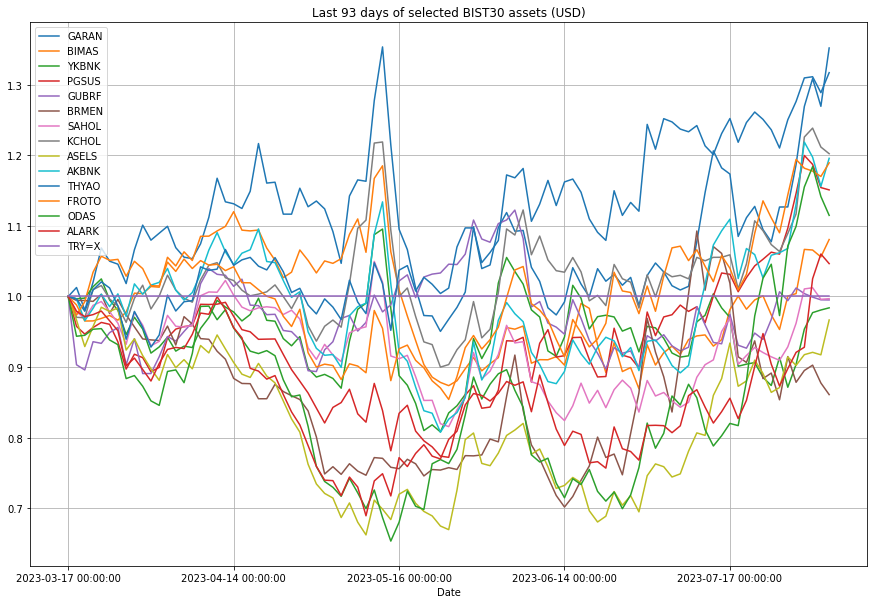

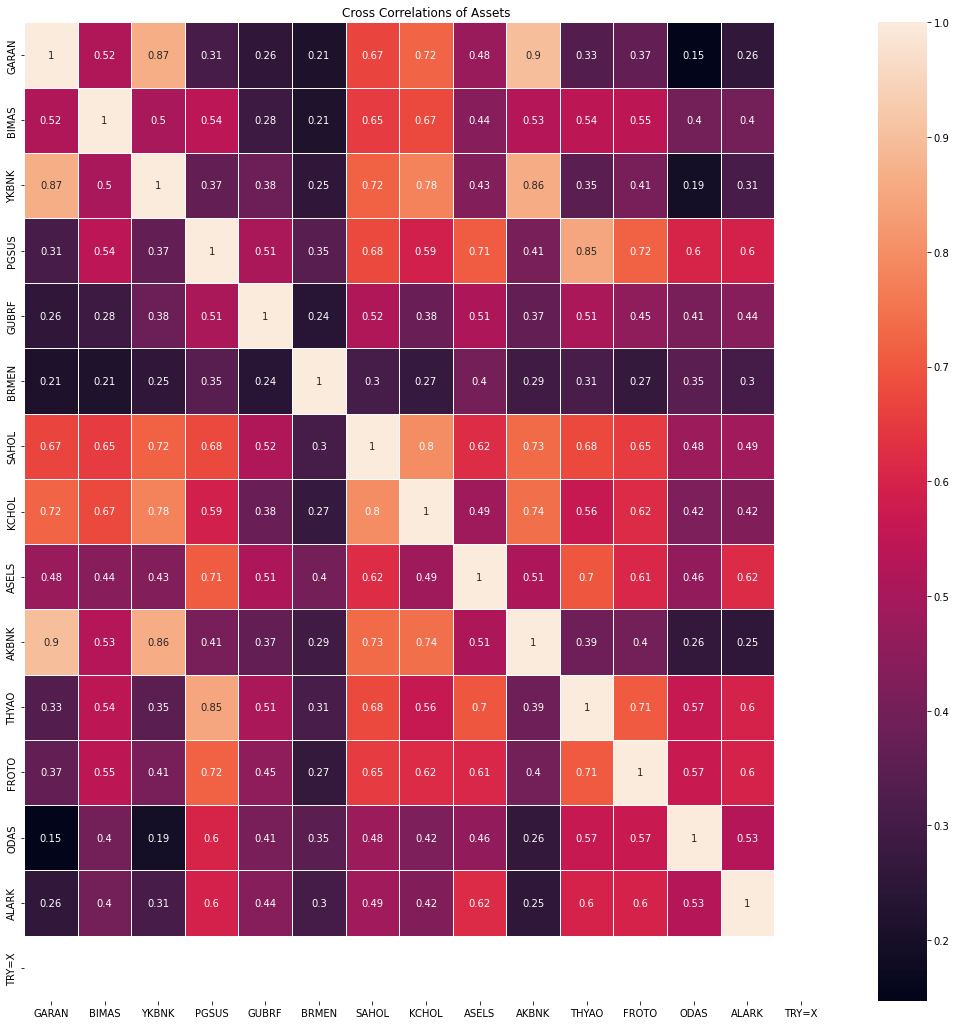

______________________________________________________________________

Performing STEP-15:


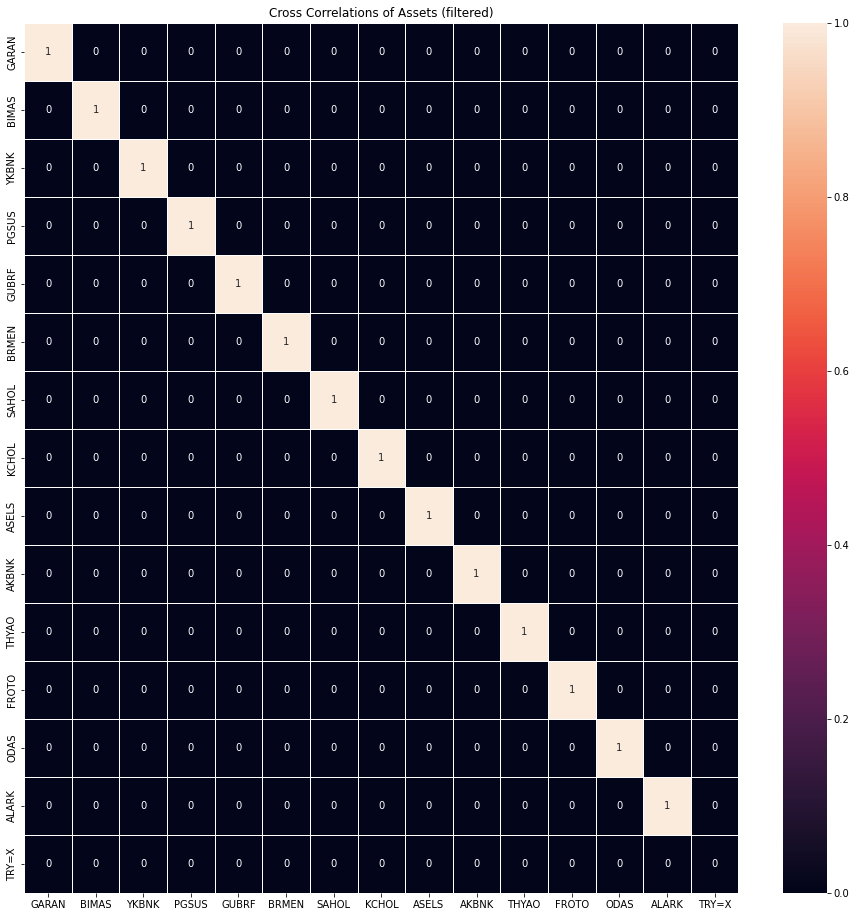

______________________________________________________________________

Performing STEP-16:
Sharpe Ratio = -0.1910828025477707
Max Sharpe Ratio = 0.9036144578313253
Max Sharpe Ratio Return = 0.75
Max Sharpe Ratio Volatility = 0.498
______________________________________________________________________

Performing STEP-17:


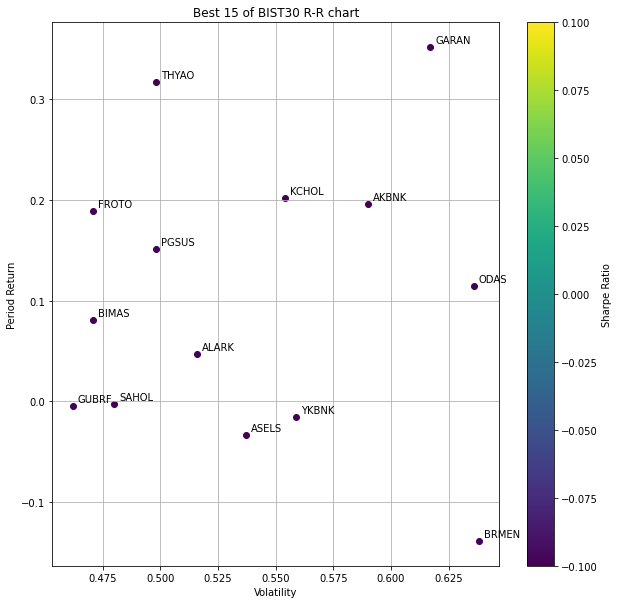

[0.08848098 0.01609316 0.02239069 0.19591813 0.02013592 0.09314947
 0.00918386 0.01761384 0.11609754 0.00698803 0.10561062 0.02989185
 0.11119167 0.10278092 0.06447332]
______________________________________________________________________

Performing STEP-18:
Evaluating Random Portfolio Stats...
{'return': 0.2538026230921452, 'risk': 0.37580648562219515, 'sharpe': -0.12292863129109974}
______________________________________________________________________

Performing STEP-19:
Montecarlo Analysis for 50000 cases of BIST30 assets


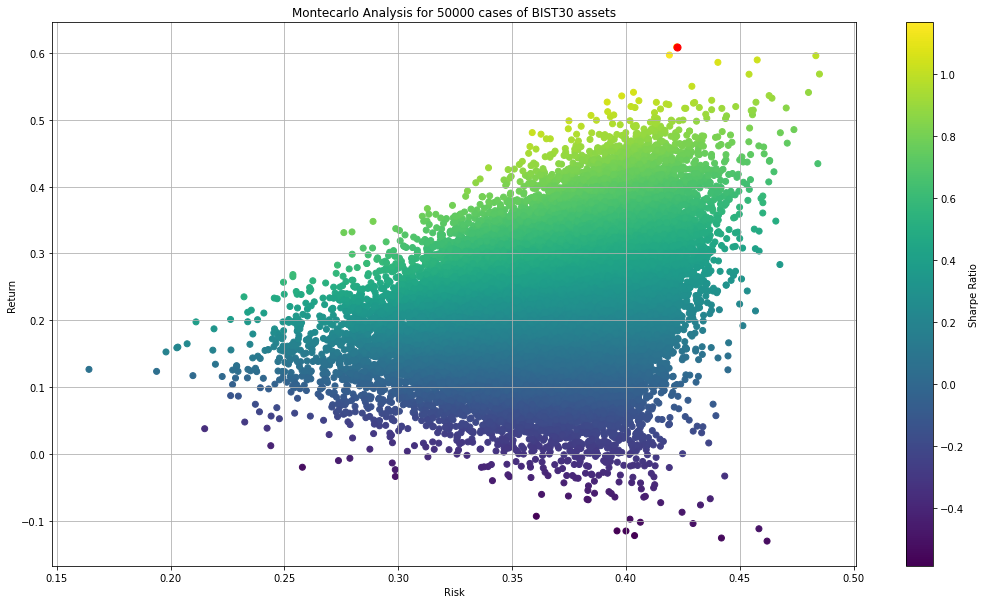

max Sharpe Ratio = 1.1686118488743007
max Sharpe Ratio return = 0.6085938752403621
max Sharpe Ratio volatility = 0.42231762630601416
______________________________________________________________________

Performing STEP-20:
Plotting possible R-R of Portfolios...
Optimal_weights_For_Highest_Sharpe_Ratio = [4.13425636e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.76542156e-16 1.00006808e-15 8.17922119e-16
 9.78817721e-16 1.02045108e-15 5.86574364e-01 0.00000000e+00
 1.97758476e-16 2.98372438e-16 0.00000000e+00]
Optimal_weights_For_Lowest_Risk = [5.73316705e-17 5.55111512e-17 4.16333634e-17 0.00000000e+00
 3.33066907e-16 0.00000000e+00 0.00000000e+00 3.17176646e-17
 5.55111512e-17 1.22196732e-16 0.00000000e+00 0.00000000e+00
 3.12250226e-17 0.00000000e+00 1.00000000e+00]


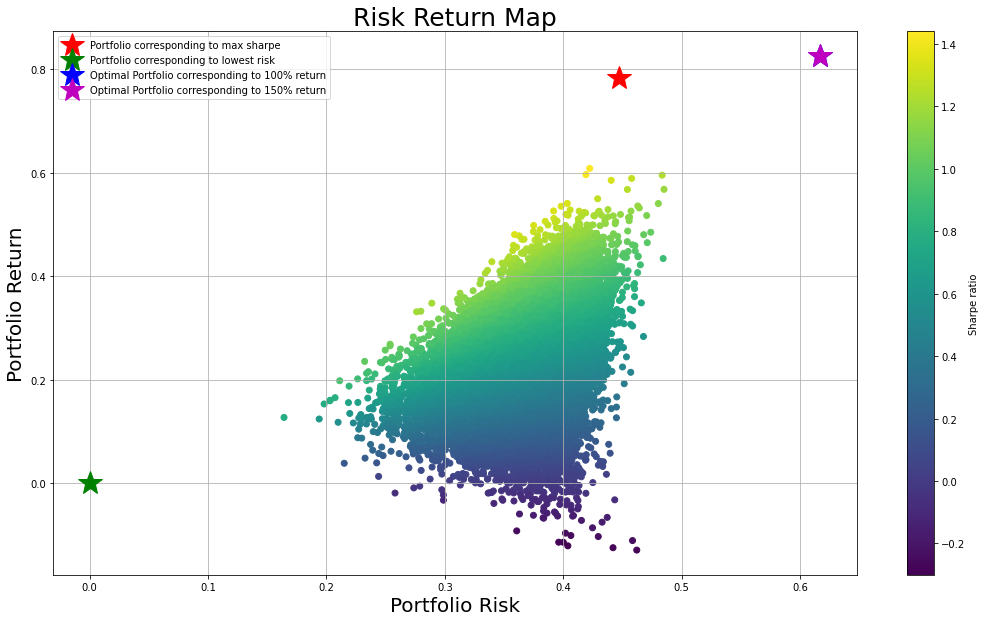

______________________________________________________________________

Performing STEP-21:
Calculating Portfolio Stats...
{'return': 0.7839910713022202, 'risk': 0.4466847950076207, 'sharpe': 1.0835181244393222}
______________________________________________________________________

Performing STEP-22:
Distribute Amounts in TL...
% weights of BEST PF
THYAO   197,539.900
GARAN   139,214.100
Name: Amount in 336754 TL, dtype: float64
Ideal Portfolio Suggested Today:            %  Amount in 336754 TL  sharpe  Std Dev %
THYAO 58.657          197,539.900  -0.120      2.367
GARAN 41.343          139,214.100  -0.120      2.367


,%,Amount in 336754 TL,sharpe,Std Dev %
THYAO,58.657,"197,539.900",-0.120,2.367
GARAN,41.343,"139,214.100",-0.120,2.367


______________________________________________________________________

Performing STEP-23:
Construct Time series...
portfolio =            %  Amount in 336754 TL  sharpe  Std Dev %
THYAO 58.657          197,539.900  -0.120      2.367
GARAN 41.343          139,214.100  -0.120      2.367 is input
Fetching THYAO
Fetching GARAN
          Date   THYAO  GARAN
0   2023-03-17 126.500 23.750
1   2023-03-20 126.100 24.060
2   2023-03-21 123.900 23.300
3   2023-03-22 127.900 24.270
4   2023-03-23 129.400 25.440
..         ...     ...    ...
88  2023-07-27 228.500 39.900
89  2023-07-28 235.000 42.760
90  2023-07-31 234.300 43.900
91  2023-08-01 231.000 42.720
92  2023-08-02 236.500 45.580

[93 rows x 3 columns]

 Initial prices: 
THYAO   126.500
GARAN    23.750
Name: 0, dtype: object 


 Final prices: 
Date     2023-08-02
THYAO       236.500
GARAN        45.580
Name: 92, dtype: object 

 Portfolio amounts: 
THYAO   197,529.794
GARAN   139,224.206
Name: %, dtype: float64 

 Portfolio shares: 
THYA

/opt/homebrew/lib/python3.9/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


********* PORTFOLIO TEARSHEET *************** 


Start date,2023-03-17
End date,2023-08-02
Total months,4
,Backtest
Annual return,461.126%
Cumulative returns,88.99%
Annual volatility,43.247%
Sharpe ratio,4.26
Calmar ratio,33.40
Stability,0.87
Max drawdown,-13.807%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,13.81,2023-05-12,2023-05-24,2023-06-02,16
1,9.87,2023-04-19,2023-05-05,2023-05-11,17
2,6.35,2023-03-23,2023-03-28,2023-04-04,9
3,5.27,2023-06-15,2023-06-21,2023-06-23,7
4,4.13,2023-07-17,2023-07-18,2023-07-19,3


********* end of TEARSHEET **************

______________________________________________________________________

Performing STEP-25:
Evaluating Present Portfolio for MYPF.csv file between 2023-03-17 and 2023-08-04 ...


/var/folders/fw/kcckd0xj57gb2qc72smx1m7r0000gn/T/ipykernel_3414/3490069884.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MYPF['Purchase Amount'] = np.trunc(MYPF['End PF %']*CURRENT_T2/100)
/var/folders/fw/kcckd0xj57gb2qc72smx1m7r0000gn/T/ipykernel_3414/3490069884.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MYPF['End Quantity'] = np.trunc(MYPF['Purchase Amount'] / MYPF['Current Price'])


,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
CANTE.IS,"4,958.000","3,000.000","14,874,000.000",19.700,"97,672.600",100.000,100.000,-99.343,"336,753.000","17,094.000"
XU100.IS,0.000,"3,000.000",0.030,"7,067.280",0.071,0.000,0.000,135.576,0.000,0.000


______________________________________________________________________

Performing STEP-26:
Construct Time series...
portfolio =            %  Amount in 336754 TL  sharpe  Std Dev %
THYAO 58.657          197,539.900  -0.120      2.367
GARAN 41.343          139,214.100  -0.120      2.367 is input
Fetching THYAO
Fetching GARAN
          Date   THYAO  GARAN
0   2023-03-17 126.500 23.750
1   2023-03-20 126.100 24.060
2   2023-03-21 123.900 23.300
3   2023-03-22 127.900 24.270
4   2023-03-23 129.400 25.440
..         ...     ...    ...
88  2023-07-27 228.500 39.900
89  2023-07-28 235.000 42.760
90  2023-07-31 234.300 43.900
91  2023-08-01 231.000 42.720
92  2023-08-02 236.500 45.580

[93 rows x 3 columns]

 Initial prices: 
THYAO   126.500
GARAN    23.750
Name: 0, dtype: object 


 Final prices: 
Date     2023-08-02
THYAO       236.500
GARAN        45.580
Name: 92, dtype: object 

 Portfolio amounts: 
THYAO   197,529.794
GARAN   139,224.206
Name: %, dtype: float64 

 Portfolio shares: 
THYA

Start date,2023-03-17
End date,2023-08-02
Total months,4
,Backtest
Annual return,461.126%
Cumulative returns,88.99%
Annual volatility,43.247%
Sharpe ratio,4.26
Calmar ratio,33.40
Stability,0.87
Max drawdown,-13.807%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,13.81,2023-05-12,2023-05-24,2023-06-02,16
1,9.87,2023-04-19,2023-05-05,2023-05-11,17
2,6.35,2023-03-23,2023-03-28,2023-04-04,9
3,5.27,2023-06-15,2023-06-21,2023-06-23,7
4,4.13,2023-07-17,2023-07-18,2023-07-19,3


********* end of TEARSHEET **************

[*********************100%***********************]  1 of 1 completed
State probabilities for BIMAS.IS:
(0.015, inf]       0.304
(-inf, -0.015]     0.185
(-0.005, 0.005]    0.185
(0.005, 0.015]     0.174
(-0.015, -0.005]   0.152
Name: Adj Close, dtype: float64
-------------------------
BIMAS return will be: (-0.005, 0.005]

[*********************100%***********************]  1 of 1 completed
State probabilities for XU100.IS:
(0.015, inf]       0.290
(-0.015, -0.005]   0.226
(-0.005, 0.005]    0.215
(-inf, -0.015]     0.140
(0.005, 0.015]     0.129
Name: Adj Close, dtype: float64
-------------------------
XU100 return will be: (0.015, inf]

mail sent with success with attachment
Disclaimer: Markov Markowitz, LLC. (the “Company”) are not registered as a securities broker dealer or investment advisor with either the U.S. Securities and Exchange Commission or with any state securities regulatory authority.
The Company is not responsible for trades 

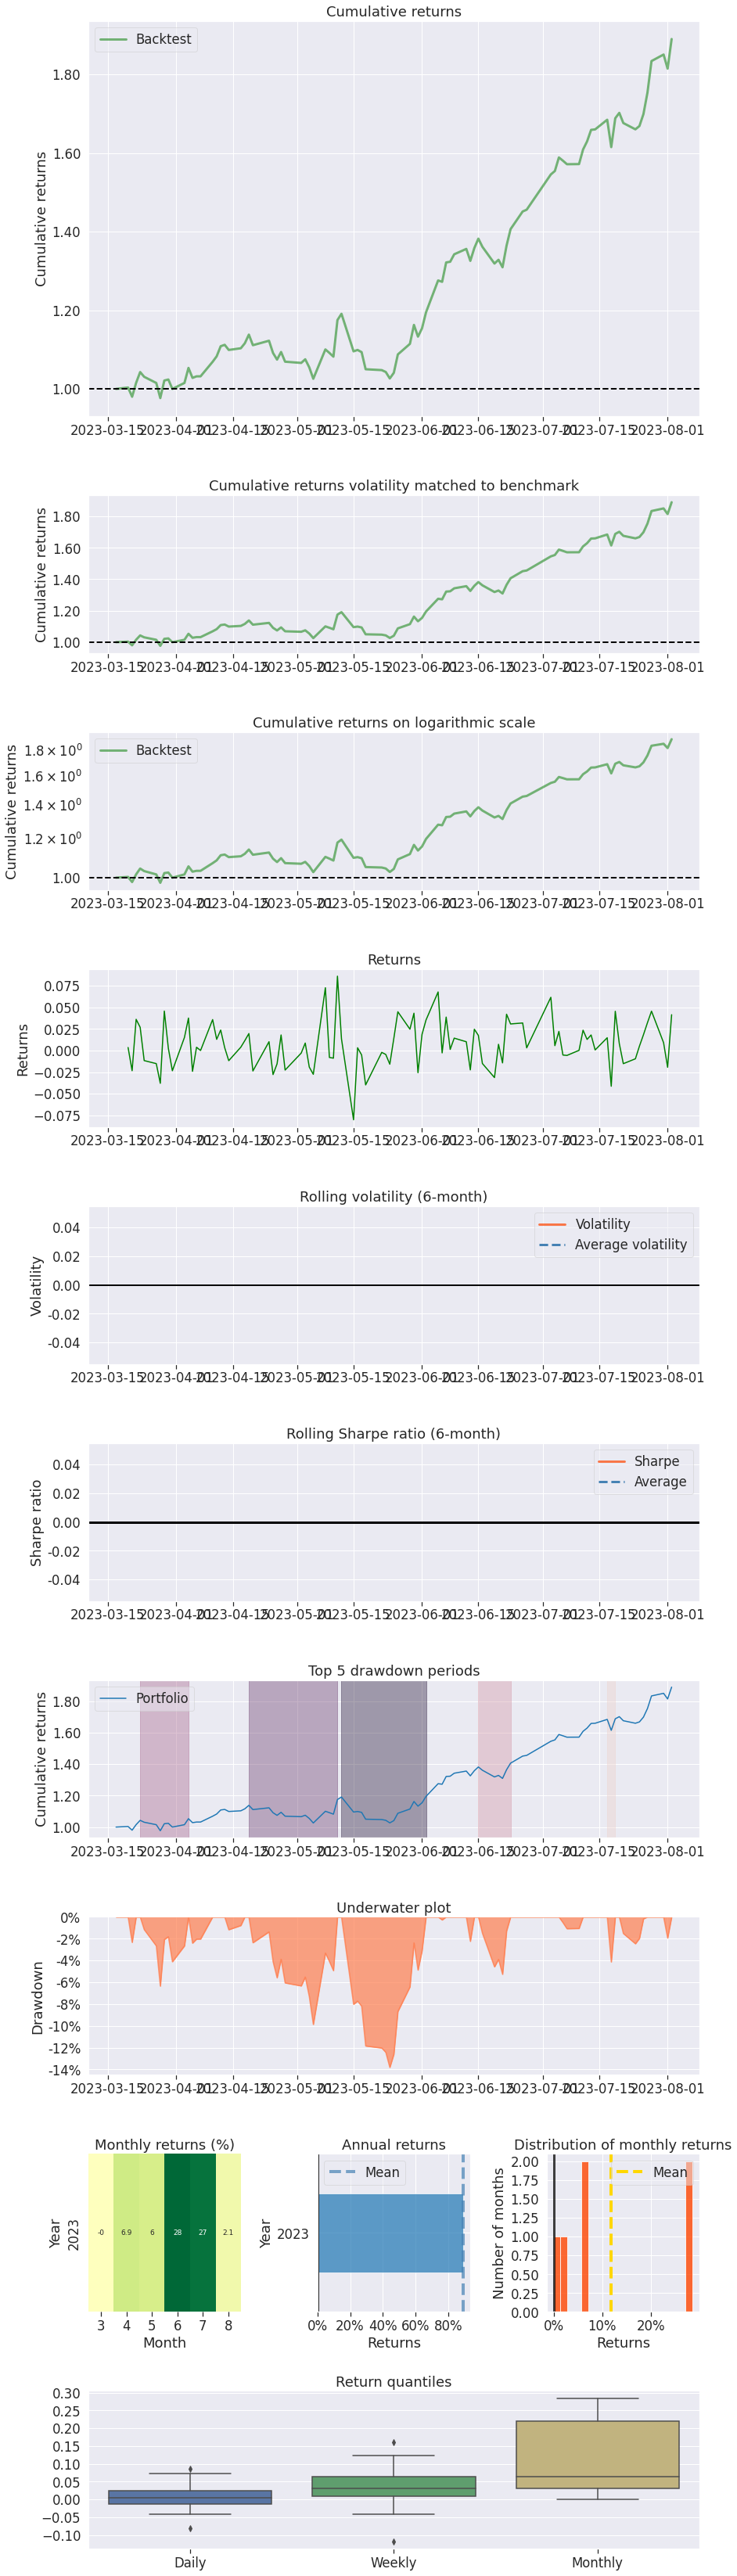

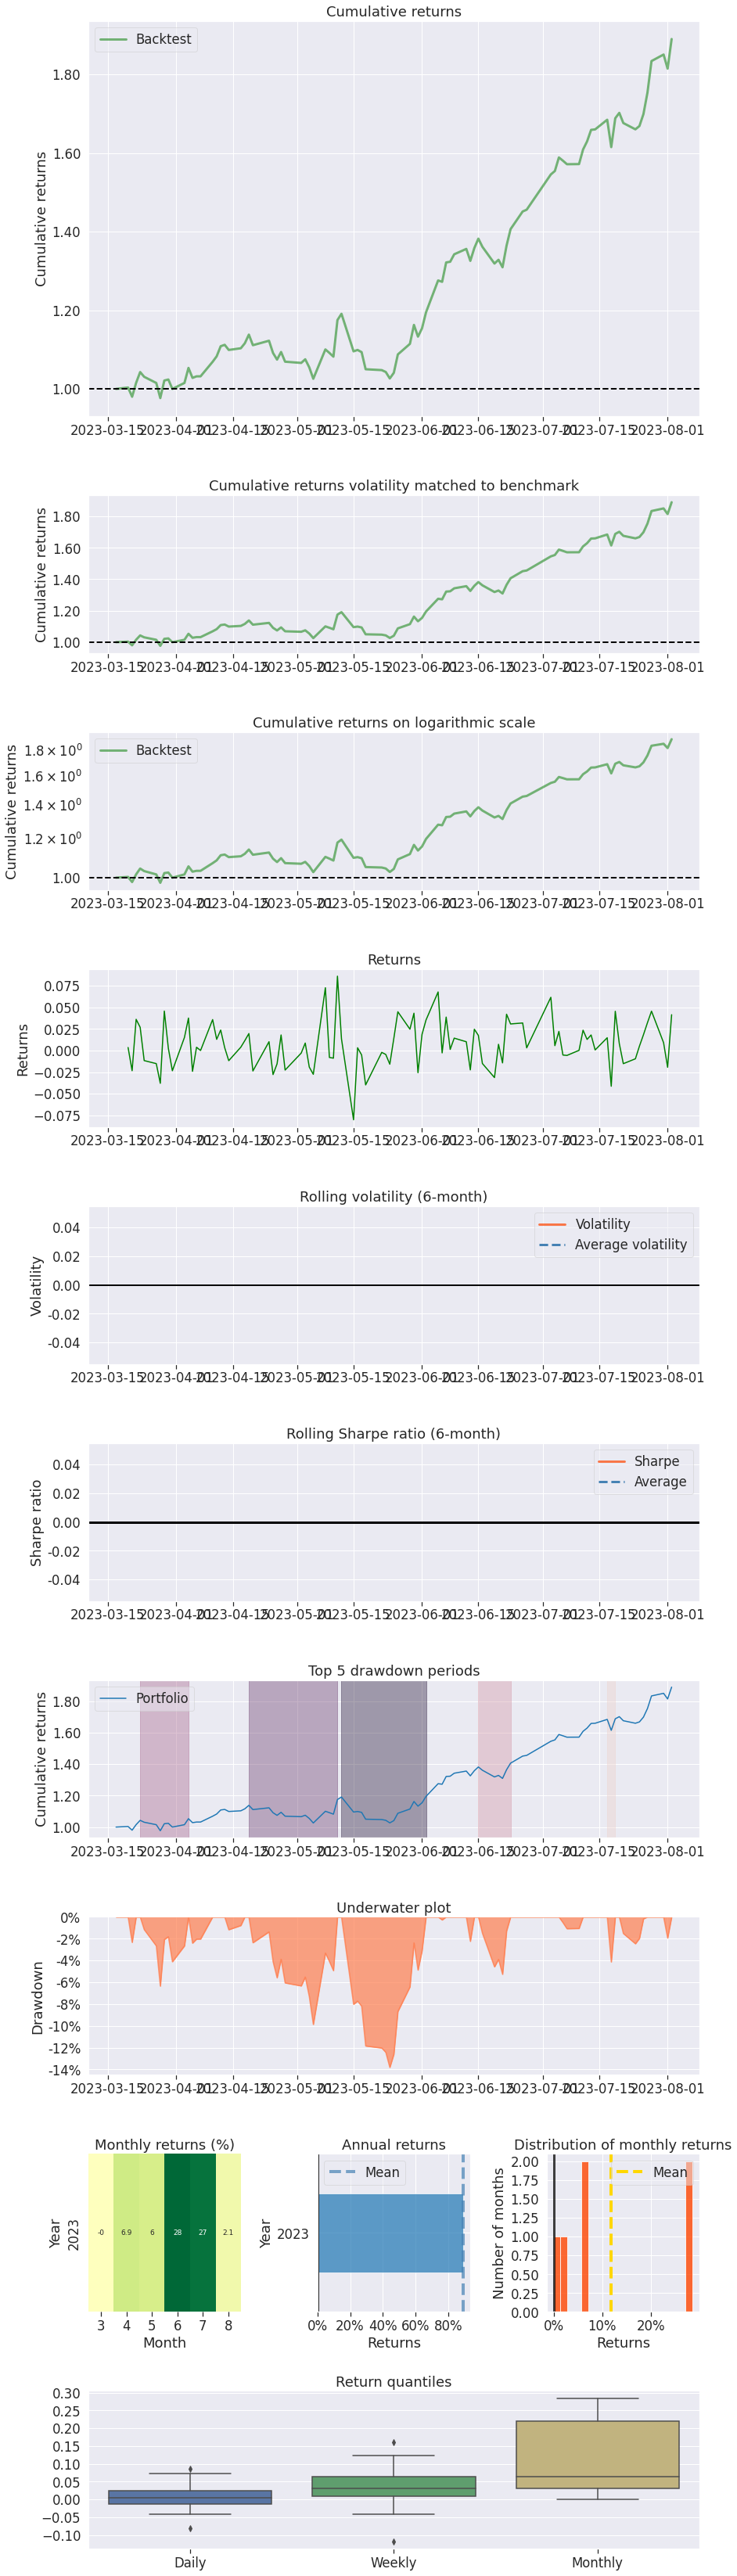

In [ ]:
# Using the special variable
# __name__
if __name__=="__main__":
    main()

In [ ]:
# right click, open New Console For Notebook, copy below to console:
# os.chdir(root)
# !jupyter nbconvert --no-input --to html MPT_v553T_TEST.ipynb
# !wkhtmltopdf MPT_v553T_TEST.html MPT_v553T_TEST.pdf


**Disclaimer:** Markov Markowitz company (the “Company”) is not registered as a securities broker dealer or investment advisor with either the U.S. Securities and Exchange Commission or with any country's securities regulatory authority.

The Company is not responsible for trades executed by users of their reports, analytics, web sites or mobile apps based on the information included herein. The information presented in the Company’s reports, analytics, etc. does not represent a recommendation to buy or sell stocks or any financial instrument nor is it intended as an endorsement of any security or investment. The information is generic by nature and is not personalized to the specific financial situation of any individual.
The user bears complete responsibility for their own investment research and should seek the advice of a qualified investment professional before making any investment decisions. Past performance is no guarantee of future results.

The alerts and signals within the Company’s website and products are for information only and should not be relied upon for investment decisions. The Company shall not be liable for any losses incurred as a result of either the accuracy or timing of the alerts. The Company is not affiliated with any other organization and is not responsible for any losses incurred because of any errors or delays in transmission of orders to the user’s account with any other organization.

Hypothetical or simulated performance results have certain limitations. Unlike an actual performance record, simulated results do not represent actual trading. Also, since the trades have not been executed, the results may have under or over compensated for the impact, if any, of certain market factors, such as lack of liquidity. Simulated trading programs in general are also subject to the fact that they are designed with the benefit of hindsight. No representation is being made that any account will or is likely to achieve profit or losses similar to those shown.

  